In [287]:
%matplotlib inline
from __future__ import print_function
import json
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [288]:
json_data=open('../json.data/graphs_v1.json')
data = json.load(json_data)
json_data.close()

In [289]:
len(data)

2849

In [290]:
data[0]

{'filename': '1.cpp',
 'nloc': 36,
 'token_count': 127,
 'problem': 'https://www.codeforces.com/contest/266/problem/B',
 'solution': 'https://www.codeforces.com/contest/266/submission/45491105',
 'exec_time': '62 ms',
 'memory': '200 KB',
 'usertype': 'Unrated,',
 'function_count': 1,
 'library_count': 1,
 'used_headers': 1,
 'macro_count': 0,
 'used_macros': 0,
 'function_details': [{'cyclomatic_complexity': 5,
   'nloc': 34,
   'token_count': 120,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 5,
   'end_line': 81,
   'parameters': [],
   'filename': '1.cpp',
   'top_nesting_level': 0,
   'length': 77,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [291]:
function_count = []
nloc = []
token_count = []
library_count = []
used_library = []
macro_count = []
usertype = []
main_cat = ['Expert','Master','Newbie','Pupil','Specialist','Unrated,','Candidate','International']
main_div1 = ['Expert','Master','Candidate','International']
main_div2 = ['Newbie','Pupil','Specialist']
userdiv = []
for x in data:
    if x['token_count'] > 0 and x['usertype'] in main_cat:
        function_count.append(x['function_count'])
        nloc.append(x['nloc'])
        token_count.append(x['token_count'])
        macro_count.append(x['macro_count'])
        library_count.append(x['library_count'])
        used_library.append(x['used_headers'])
        usertype.append(x['usertype'])
        if x['usertype'] in main_div1:
            userdiv.append('Div 1')
        else:
            userdiv.append('Div 2')

In [292]:
for each in main_cat:
    print(each,usertype.count(each))

Expert 496
Master 88
Newbie 500
Pupil 501
Specialist 499
Unrated, 500
Candidate 239
International 7


In [293]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [294]:
def plot_data_2D(X,Y,title='title',color='b'):
    plt.scatter(X,Y,c=color,alpha=0.1)
    plt.title(title)

In [295]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [296]:
def stat_display(data):
    stat_data = stats.describe(data)
    print ('min : ' , stat_data.minmax[0])
    print ('max : ' , stat_data.minmax[1])
    print ('mean : ' , stat_data.mean)
    print ('variance : ' , stat_data.variance)
    print ('skewness : ' , stat_data.skewness)
    print ('kurtosis : ' , stat_data.kurtosis)

In [297]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [298]:
def find_min_json(arr):
    return data[np.argmin(arr)]

In [299]:
def plot_data_1D_cat(X,C,title='Title'):
    c = ['b','r','m','g','c','y']
    Y = []
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hlines(1,1,np.max(data)+np.max(data)*0.5)
        
        Y = np.ones(len(data))
        
        ax[i].plot(data,Y,'|',ms = 40,c = c[i%6],label=x)
        ax[i].legend(loc="upper right")
    plt.title(title,y=len(set(C))+2)

In [300]:
def plot_data_2D_cat(X,Y,C,title='Title'):
    c = ['b','r','m','g','c','y']
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    cat = []
    plot = []
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        point = []
        for y,z,w in zip(X,Y,C):
            if w == x:
                data.append(y)
                point.append(z)
    
        l = ax[i].scatter(data,point,c=c[i%6],alpha=0.2)
        plot.append(l)
        cat.append(x)
    plt.title(title,y=len(set(C))+2) 
    plt.legend(plot,cat,bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure)

In [301]:
def plot_frequency_cat(X,C,title='Title'):
    c = ['b','r','m','g','c','y']
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left',label=x,color=c[i%6])
        ax[i].legend(prop={'size':10})
    plt.title(title,y=len(set(C))+2)
#     plt.legend(plot,cat)

In [302]:
def box_plot_cat(X,C,title='Title'):
    l = [[]]*len(set(C))
    label = [[]]*len(set(C))
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        l[i] = data
        label[i] = x
    fig = plt.figure(1, figsize=(9, 6))
    plt.title(title)
    ax = fig.add_subplot(111)
    bp = ax.boxplot(l)
    ax.set_xticklabels(label)

In [303]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"]

[6.0, 4.0]


[9.0, 12.0]

In [304]:
stat_display(library_count)

min :  0
max :  75
mean :  2.4636042402826854
variance :  18.915429917550057
skewness :  7.145895549638506
kurtosis :  88.50888194348265


In [305]:
stat_display(used_library)

min :  0
max :  29
mean :  1.5724381625441697
variance :  7.038052377758374
skewness :  6.319179553697523
kurtosis :  44.60828101247852


In [306]:
used_total = []
used_total_div = []
counter1 = 0
for x,y in zip(library_count,used_library):
    if x==0:
        counter1 += 1
        continue
    used_total.append((y/x)*100)
    used_total_div.append(userdiv[counter1])
    counter1 += 1
stat_display(used_total)

min :  0.0
max :  100.0
mean :  86.37488537883621
variance :  821.646107819862
skewness :  -1.8738372217957764
kurtosis :  2.0230642059996615


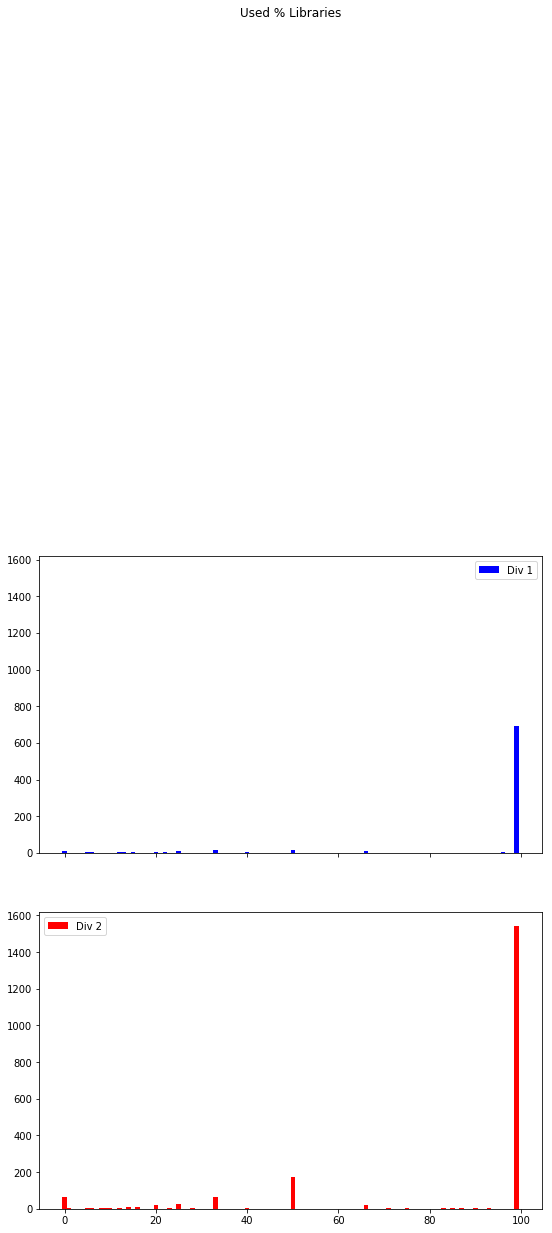

In [307]:
plot_frequency_cat(used_total,used_total_div,'Used % Libraries')

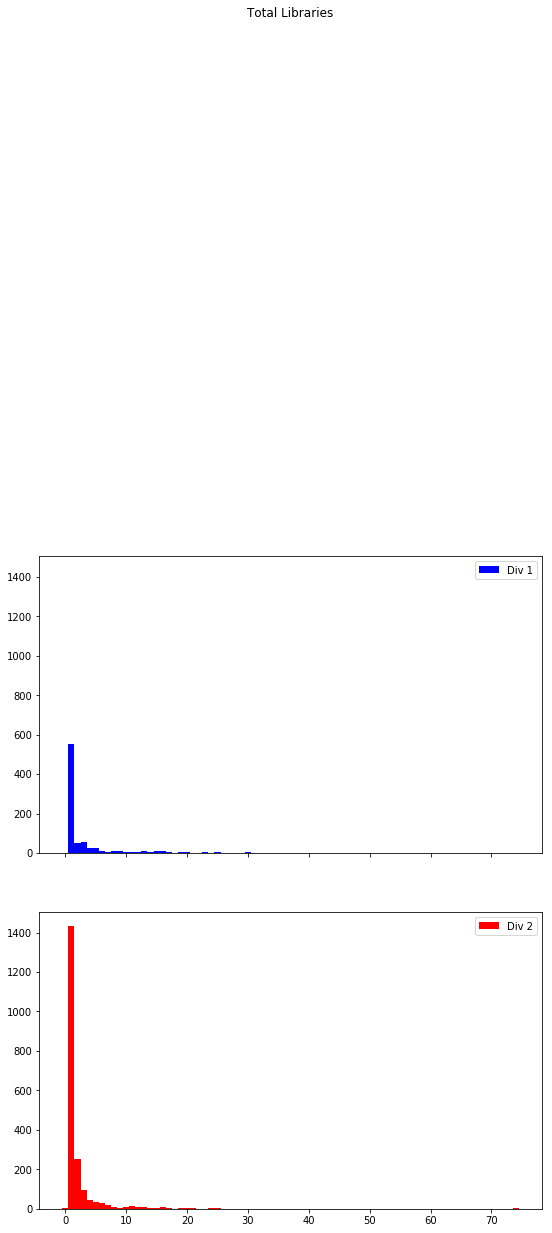

In [308]:
plot_frequency_cat(library_count,userdiv,'Total Libraries')

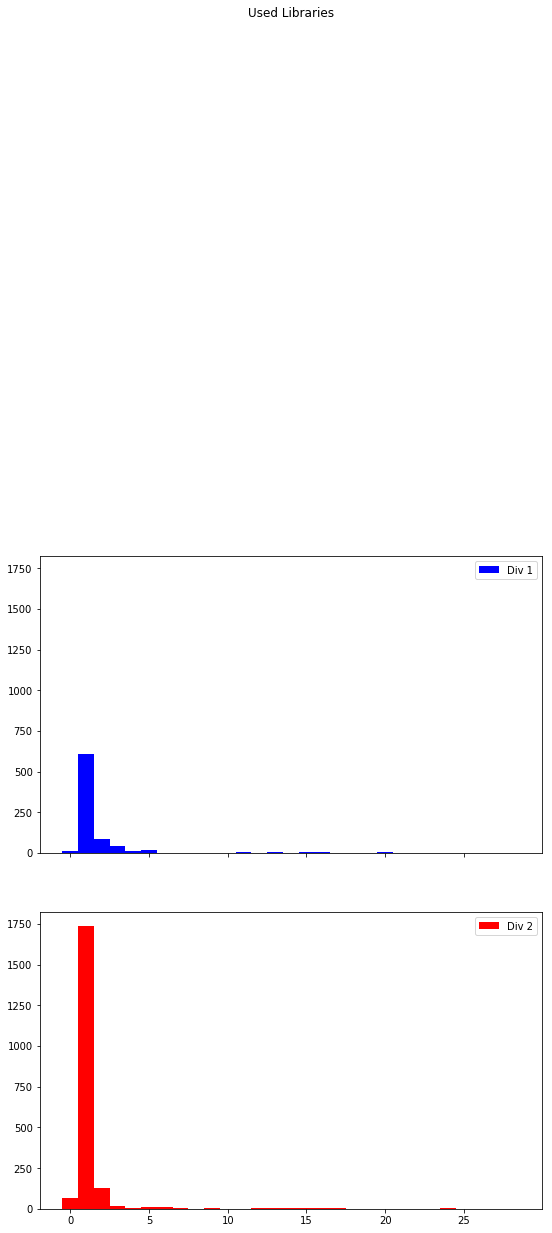

In [309]:
plot_frequency_cat(used_library,userdiv,'Used Libraries')

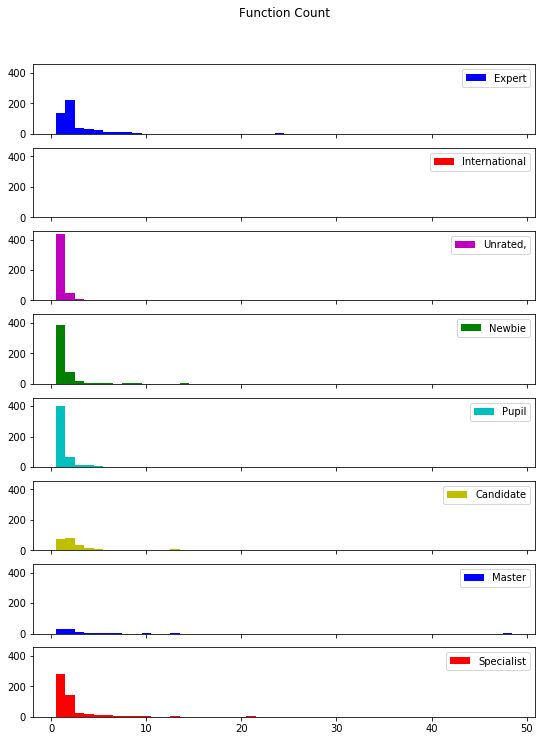

In [310]:
plot_frequency_cat(function_count,usertype,'Function Count')

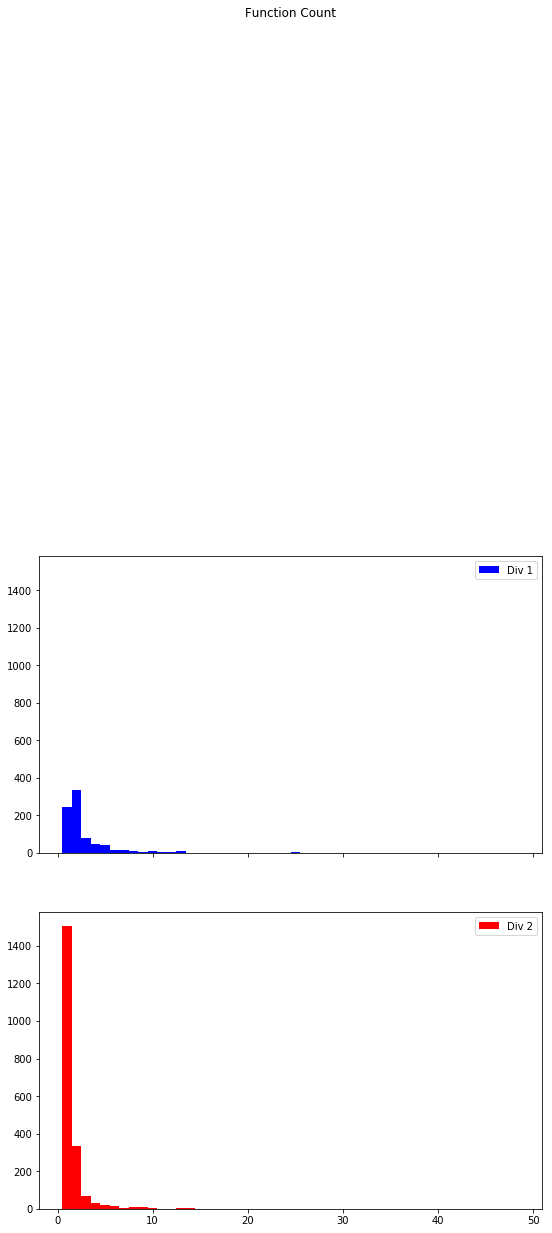

In [311]:
plot_frequency_cat(function_count,userdiv,'Function Count')

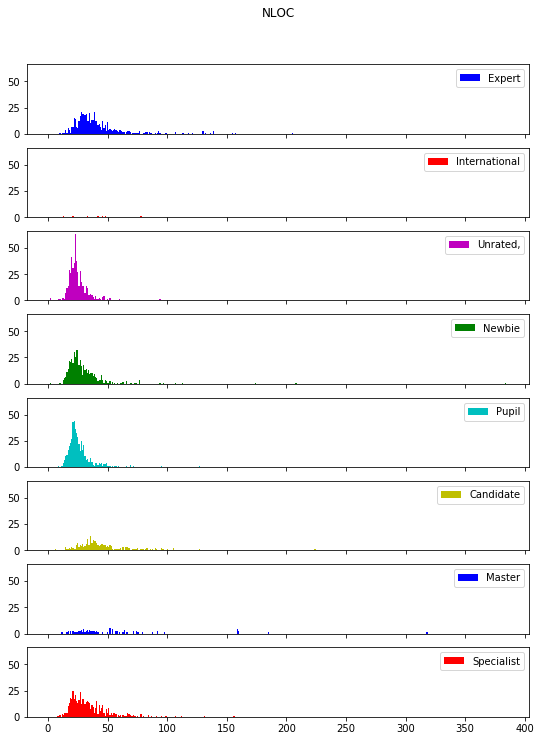

In [312]:
plot_frequency_cat(nloc,usertype,'NLOC')

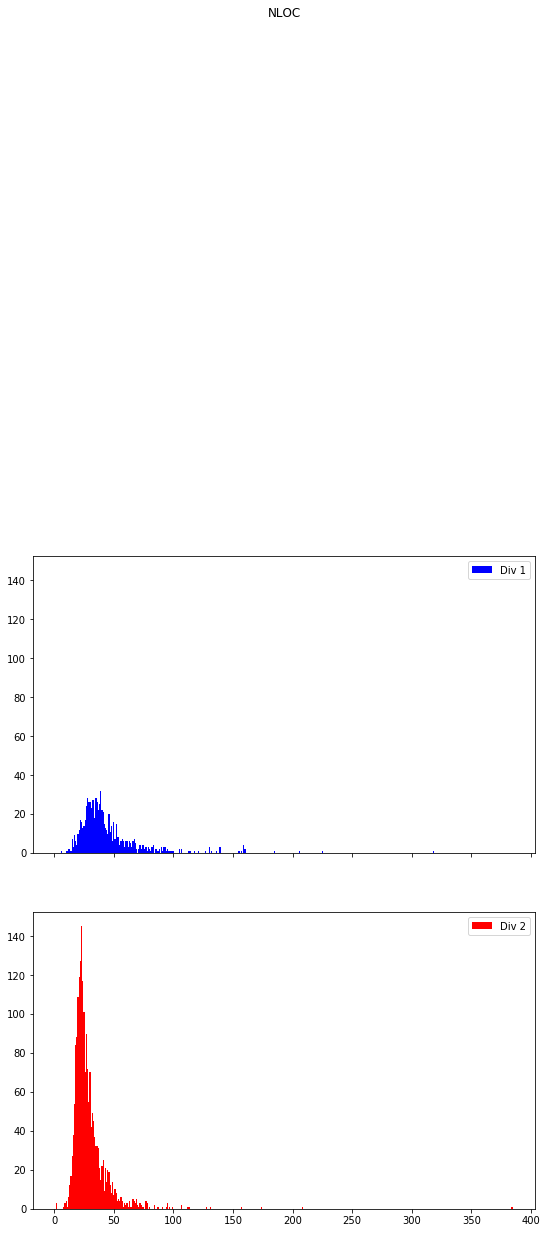

In [313]:
plot_frequency_cat(nloc,userdiv,'NLOC')

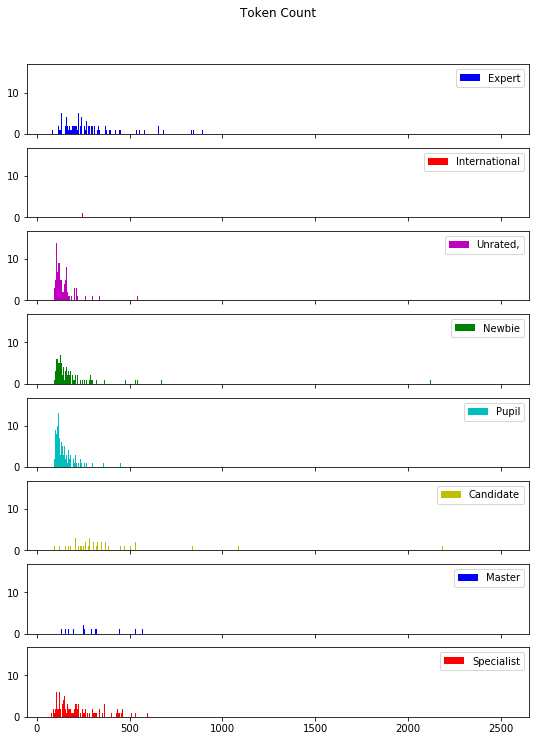

In [314]:
plot_frequency_cat(token_count,usertype,'Token Count')

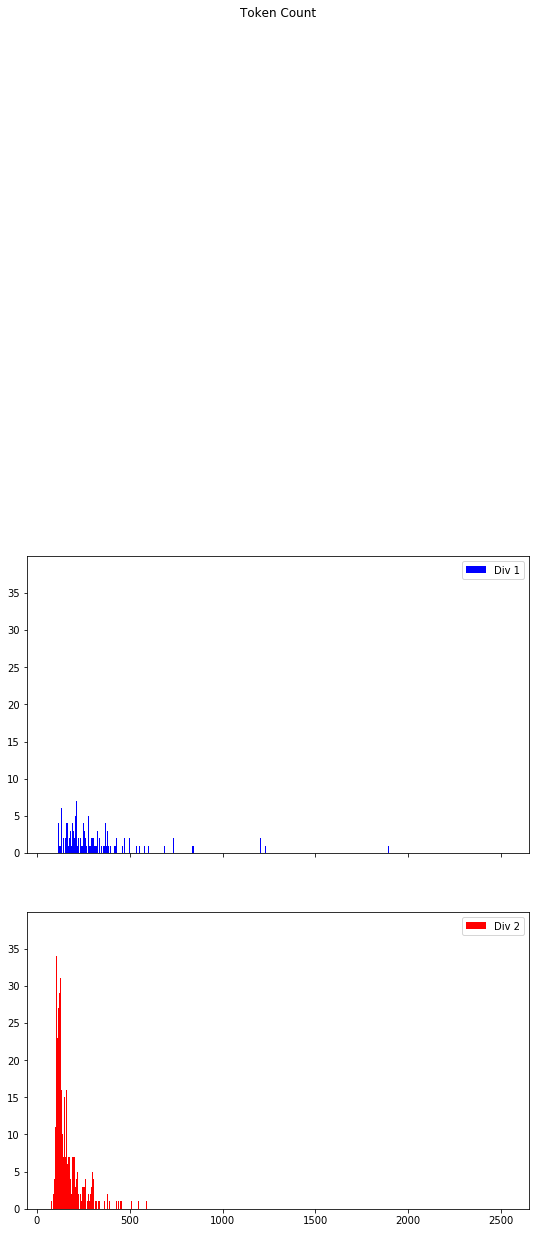

In [315]:
plot_frequency_cat(token_count,userdiv,'Token Count')

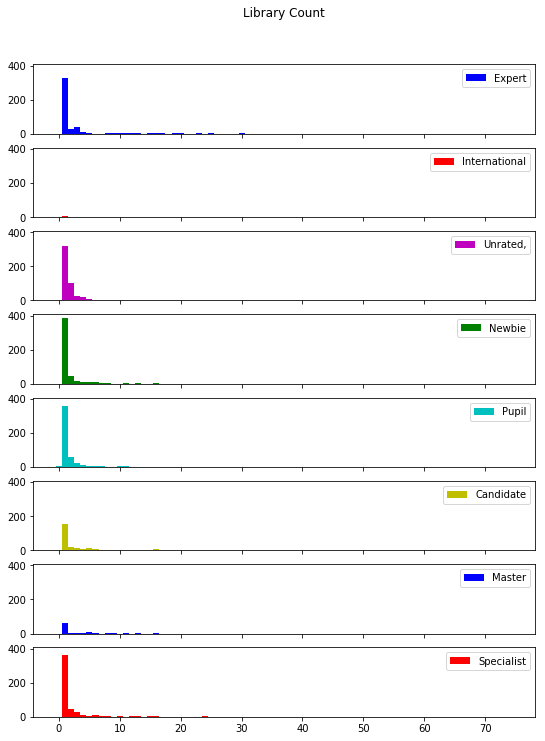

In [316]:
plot_frequency_cat(library_count,usertype,'Library Count')

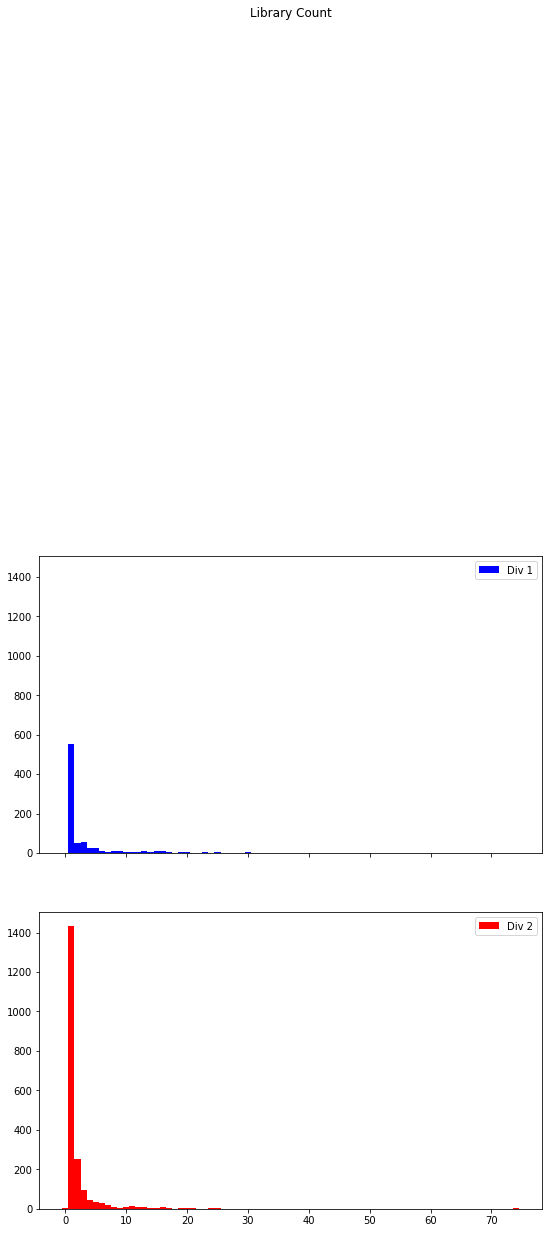

In [317]:
plot_frequency_cat(library_count,userdiv,'Library Count')

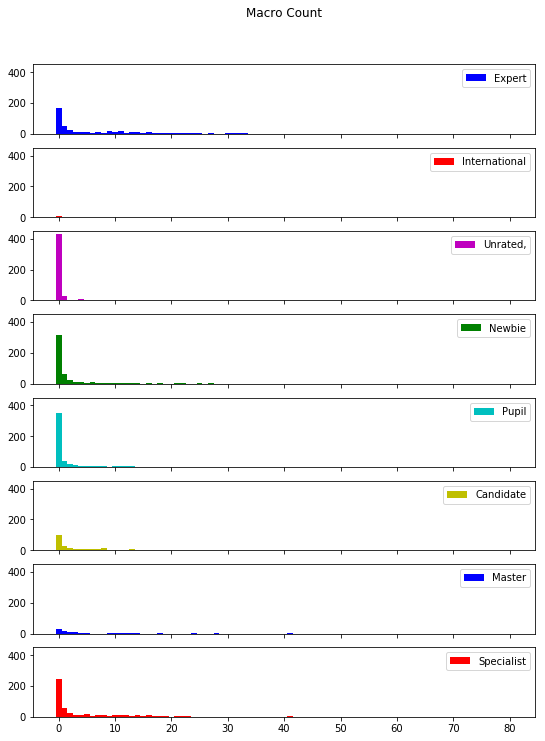

In [318]:
plot_frequency_cat(macro_count,usertype,'Macro Count')

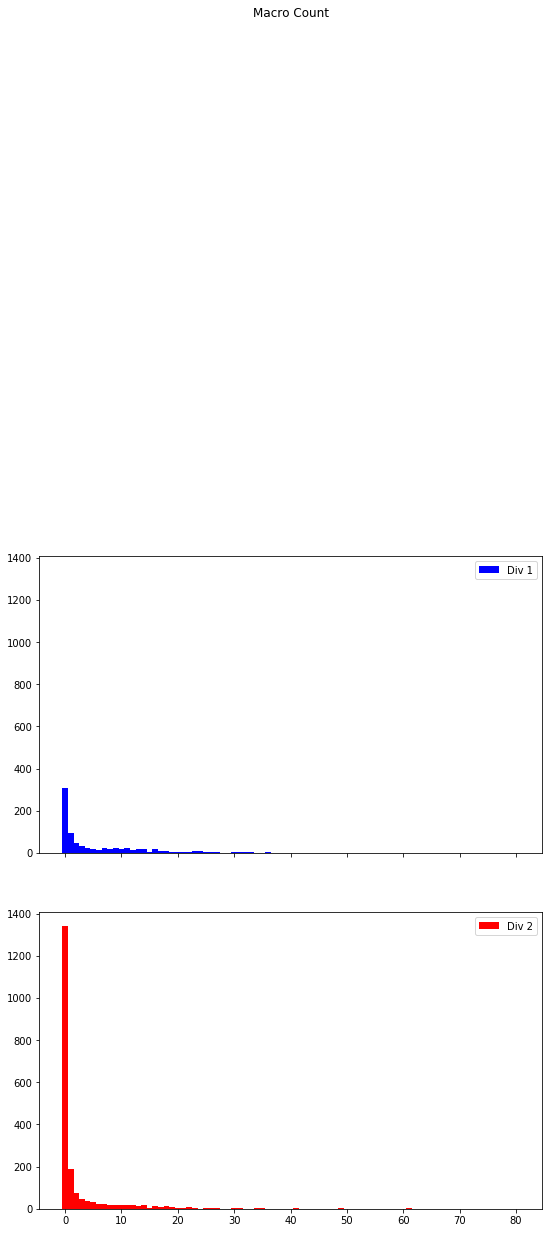

In [319]:
plot_frequency_cat(macro_count,userdiv,'Macro Count')

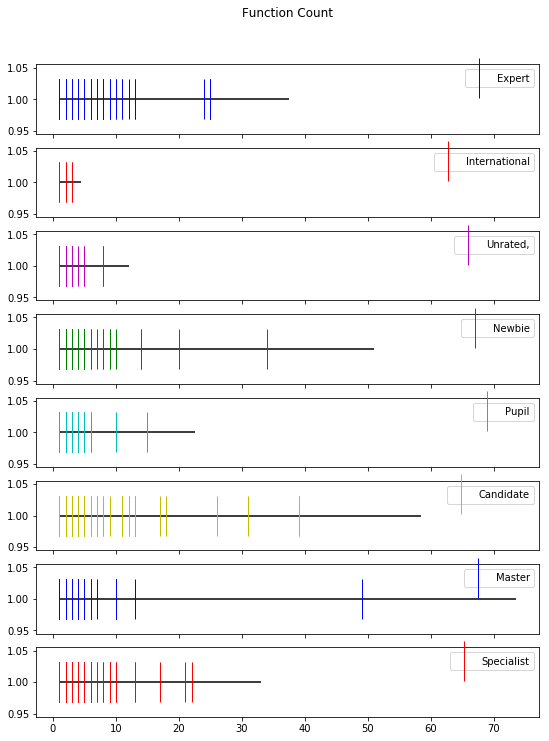

In [320]:
plot_data_1D_cat(function_count,usertype,title='Function Count')

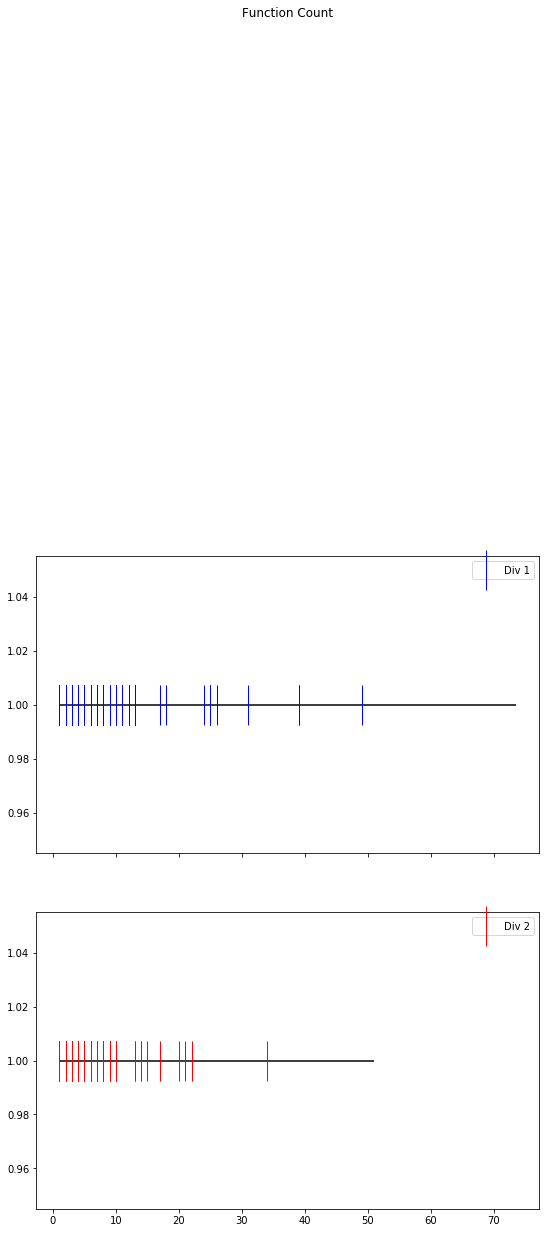

In [321]:
plot_data_1D_cat(function_count,userdiv,title='Function Count')

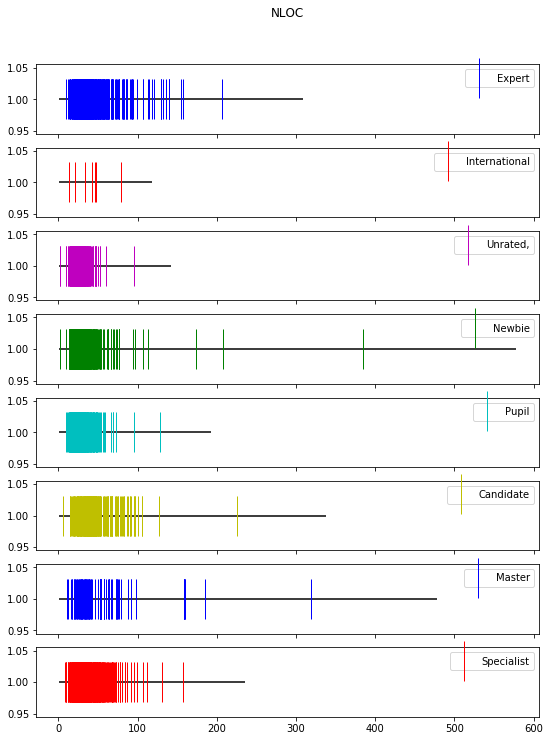

In [322]:
plot_data_1D_cat(nloc,usertype,title='NLOC')

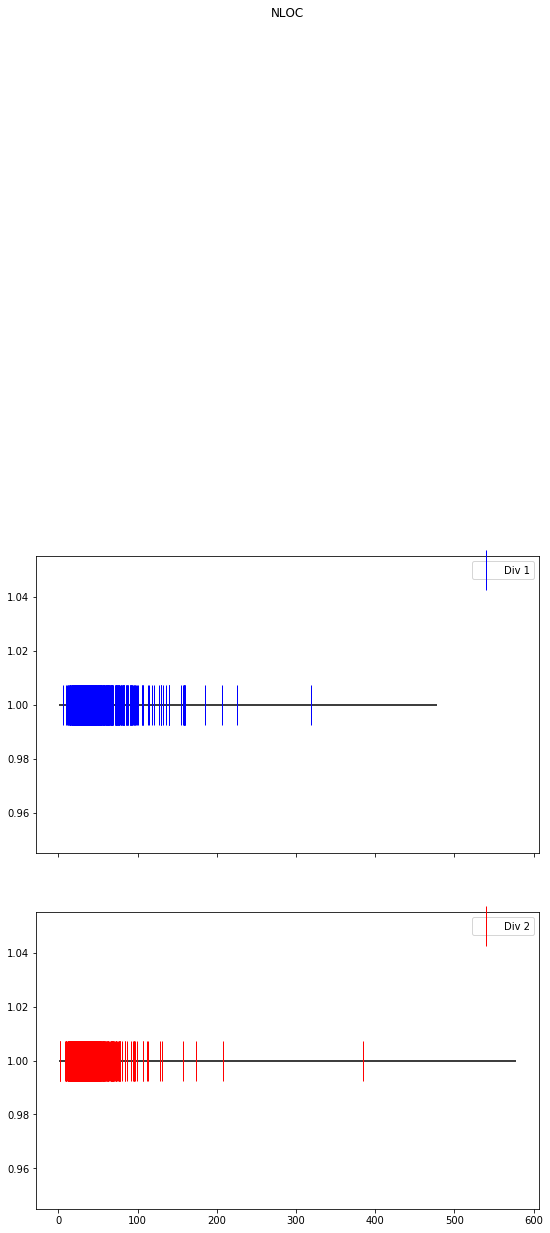

In [323]:
plot_data_1D_cat(nloc,userdiv,title='NLOC')

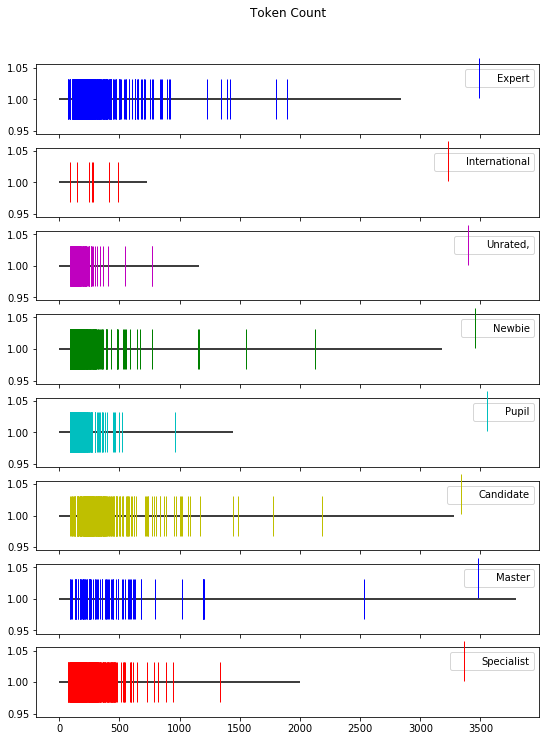

In [324]:
plot_data_1D_cat(token_count,usertype,title='Token Count')

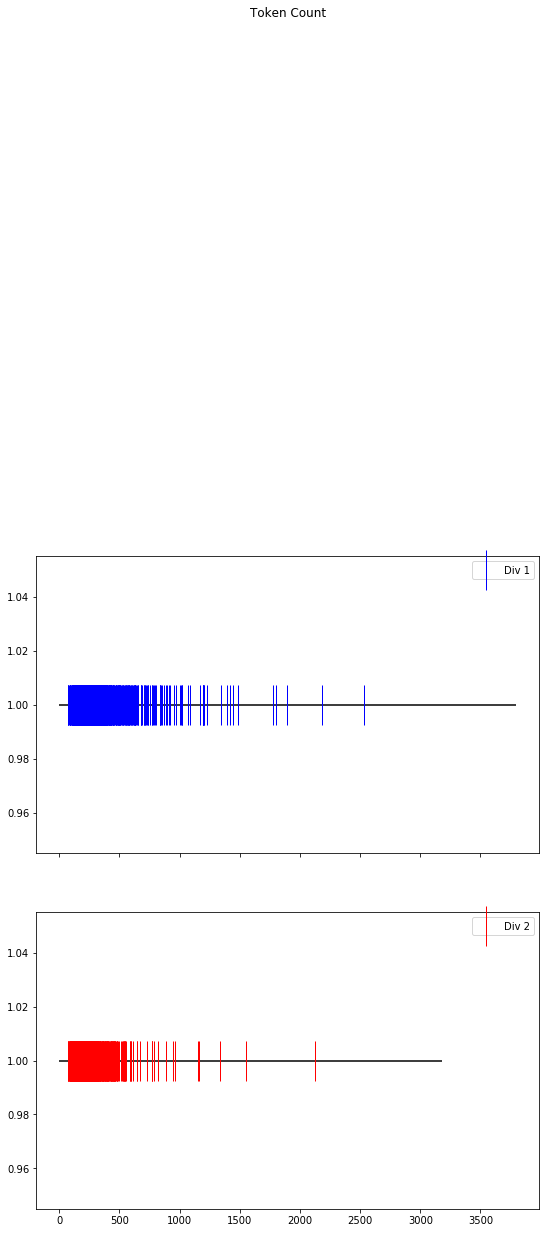

In [325]:
plot_data_1D_cat(token_count,userdiv,title='Token Count')

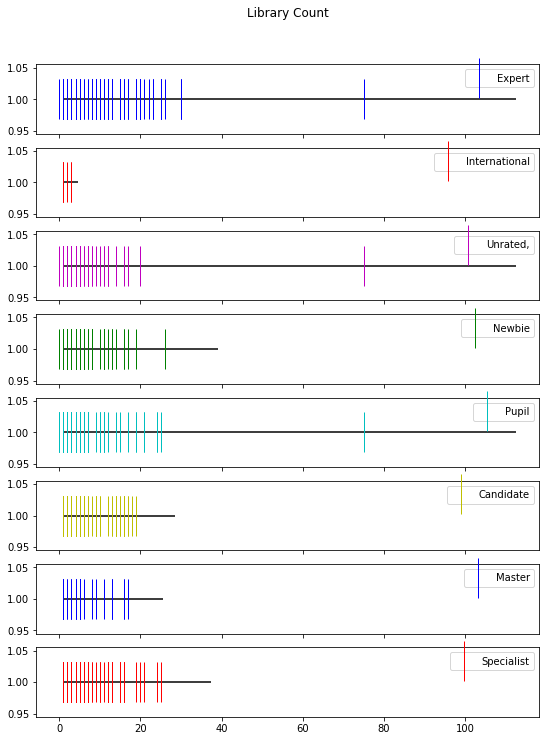

In [326]:
plot_data_1D_cat(library_count,usertype,title='Library Count')

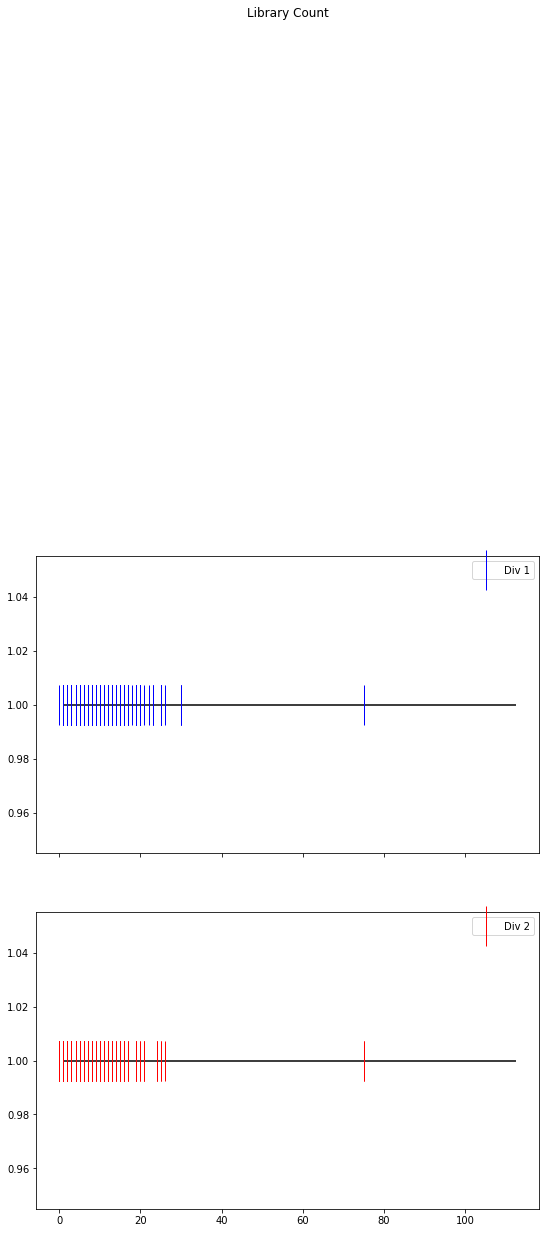

In [327]:
plot_data_1D_cat(library_count,userdiv,title='Library Count')

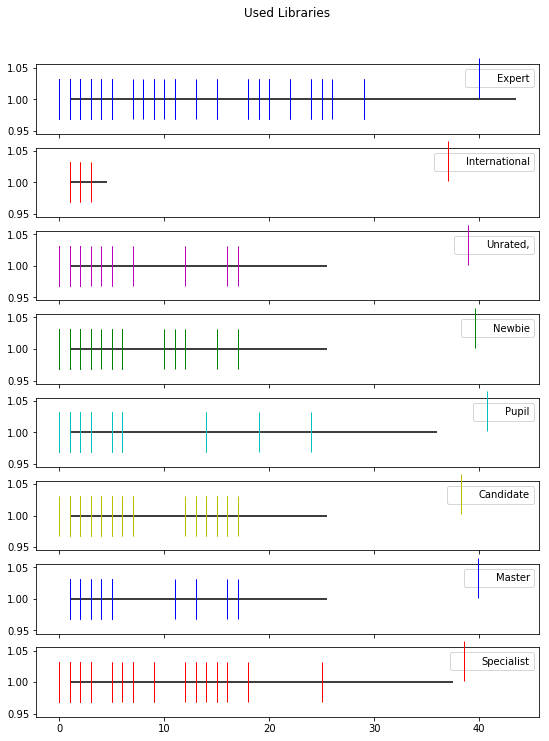

In [328]:
plot_data_1D_cat(used_library,usertype,'Used Libraries')

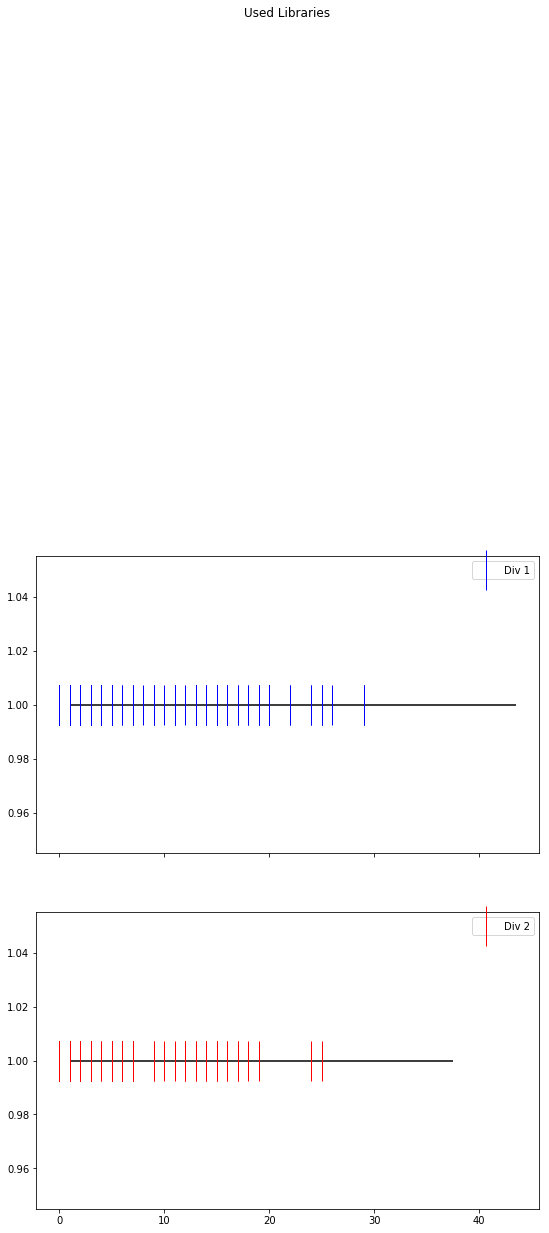

In [329]:
plot_data_1D_cat(used_library,userdiv,'Used Libraries')

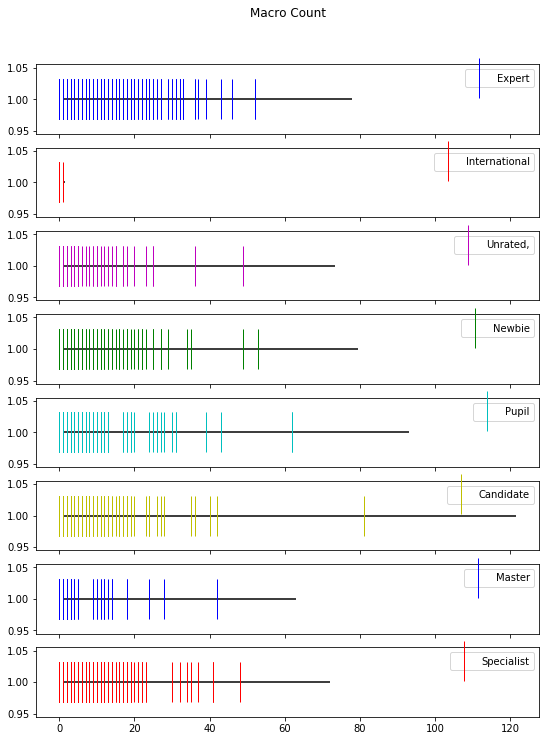

In [330]:
plot_data_1D_cat(macro_count,usertype,title='Macro Count')

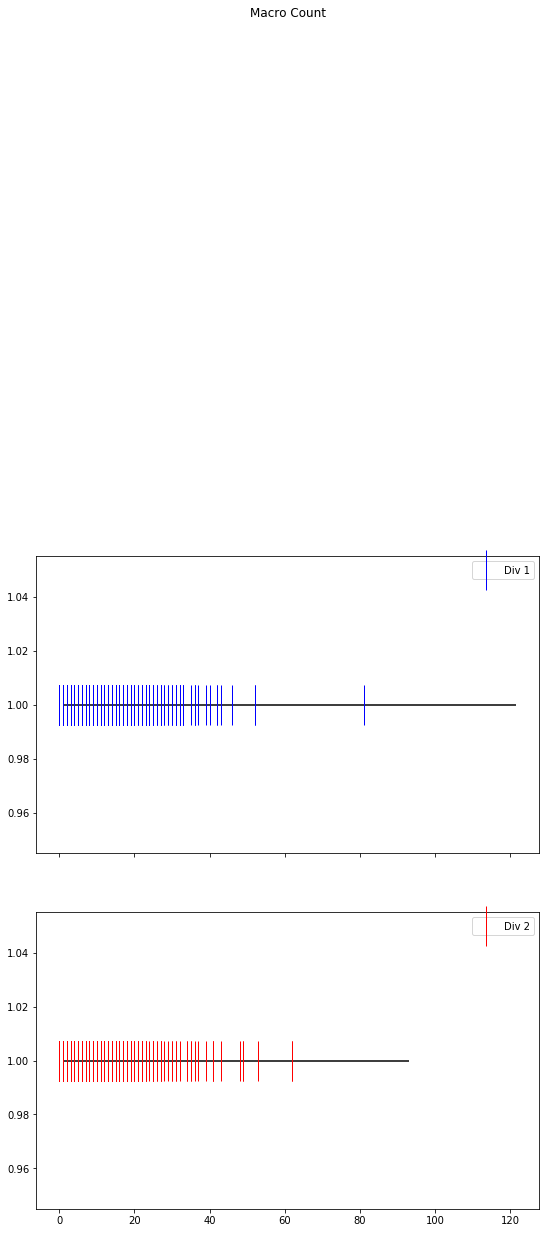

In [331]:
plot_data_1D_cat(macro_count,userdiv,title='Macro Count')

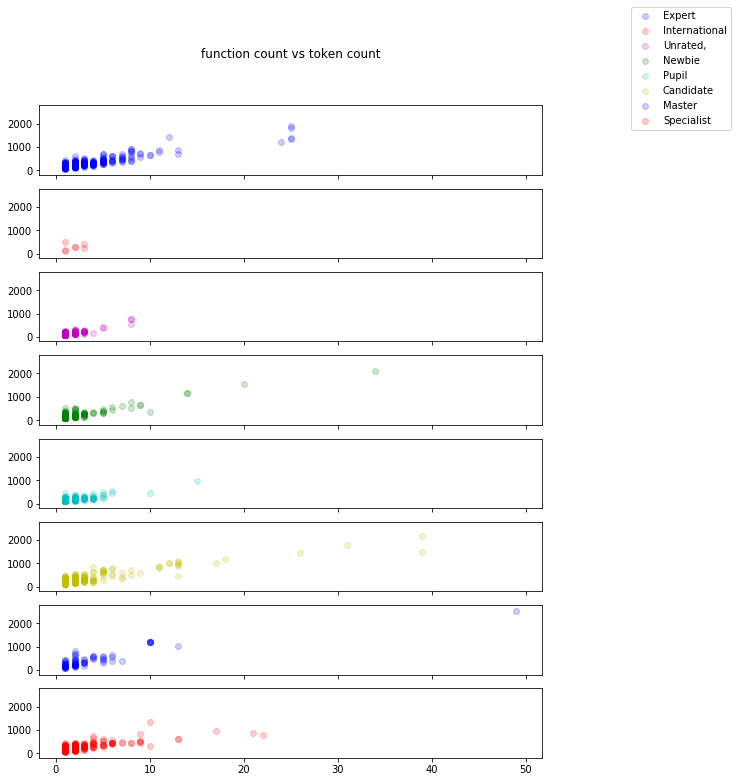

In [332]:
plot_data_2D_cat(function_count,token_count,usertype,'function count vs token count')

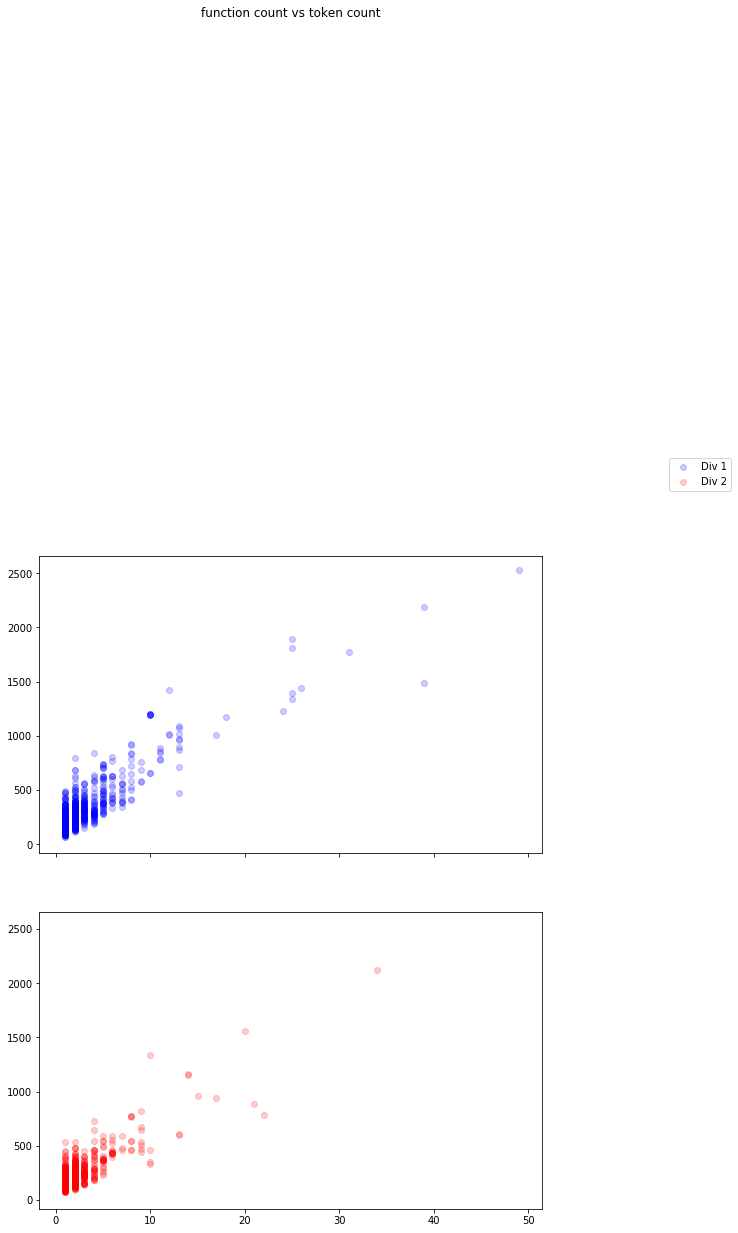

In [333]:
plot_data_2D_cat(function_count,token_count,userdiv,'function count vs token count')

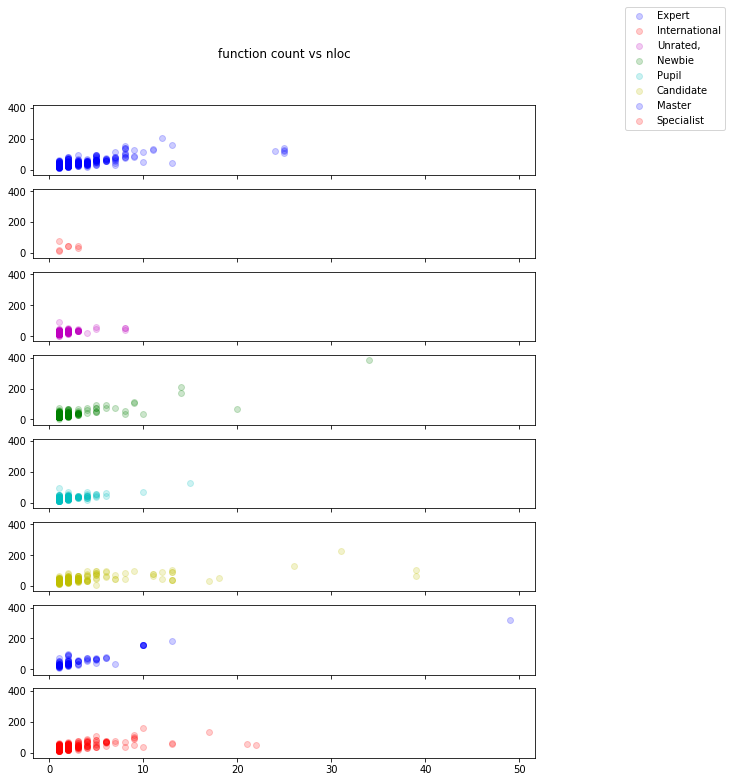

In [334]:
plot_data_2D_cat(function_count,nloc,usertype,'function count vs nloc')

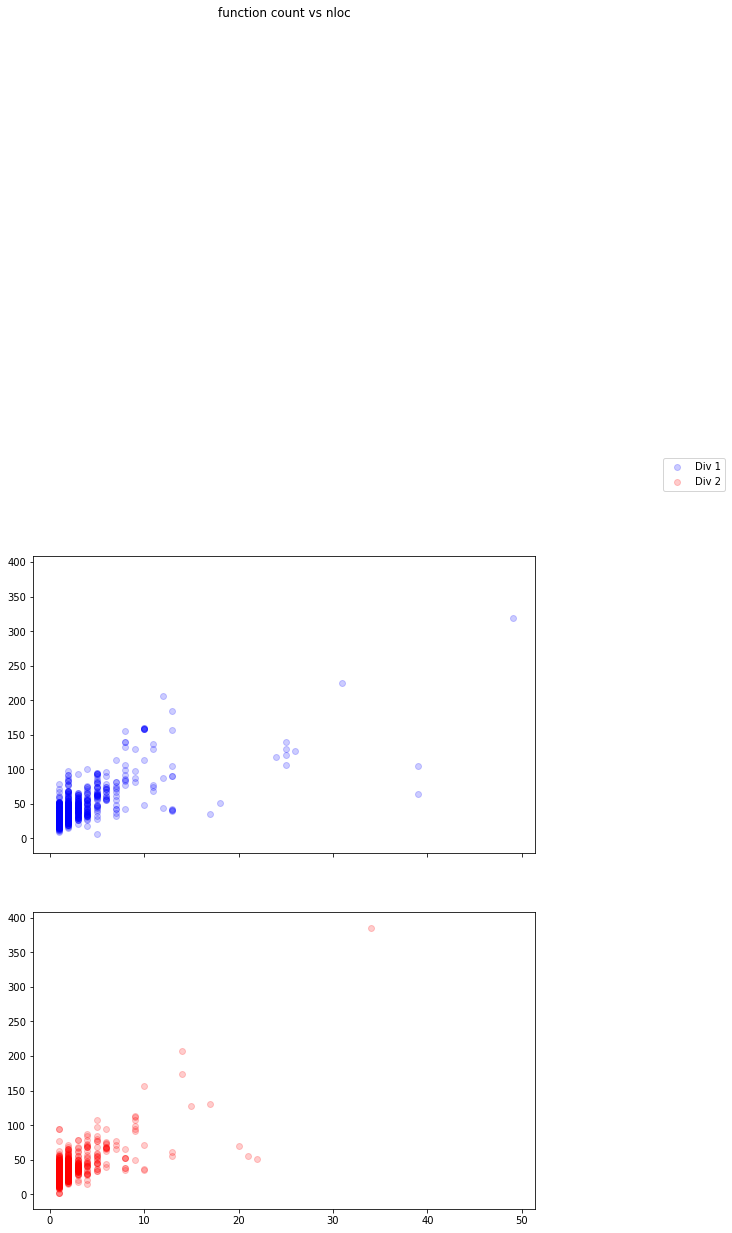

In [335]:
plot_data_2D_cat(function_count,nloc,userdiv,'function count vs nloc')

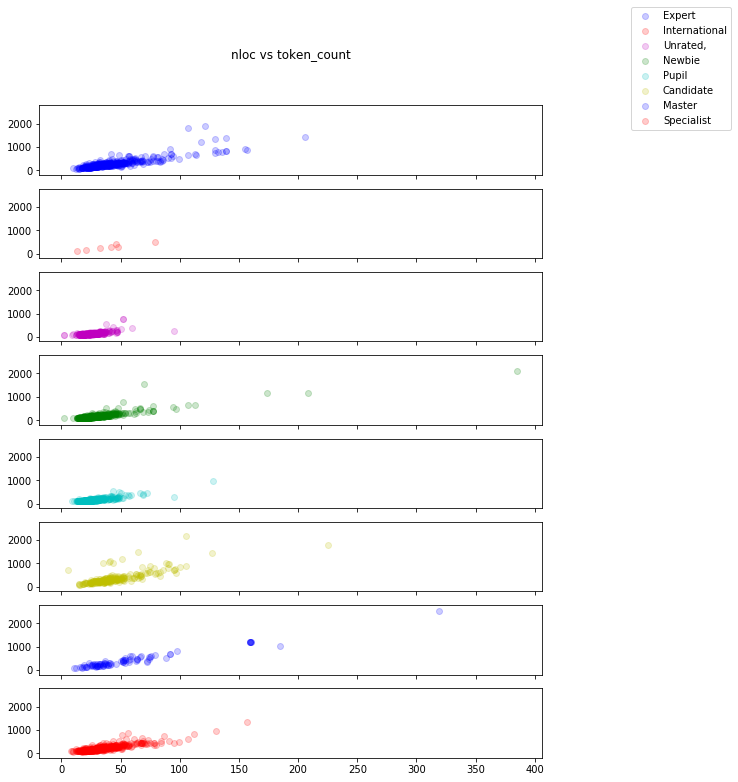

In [336]:
plot_data_2D_cat(nloc,token_count,usertype,'nloc vs token_count')

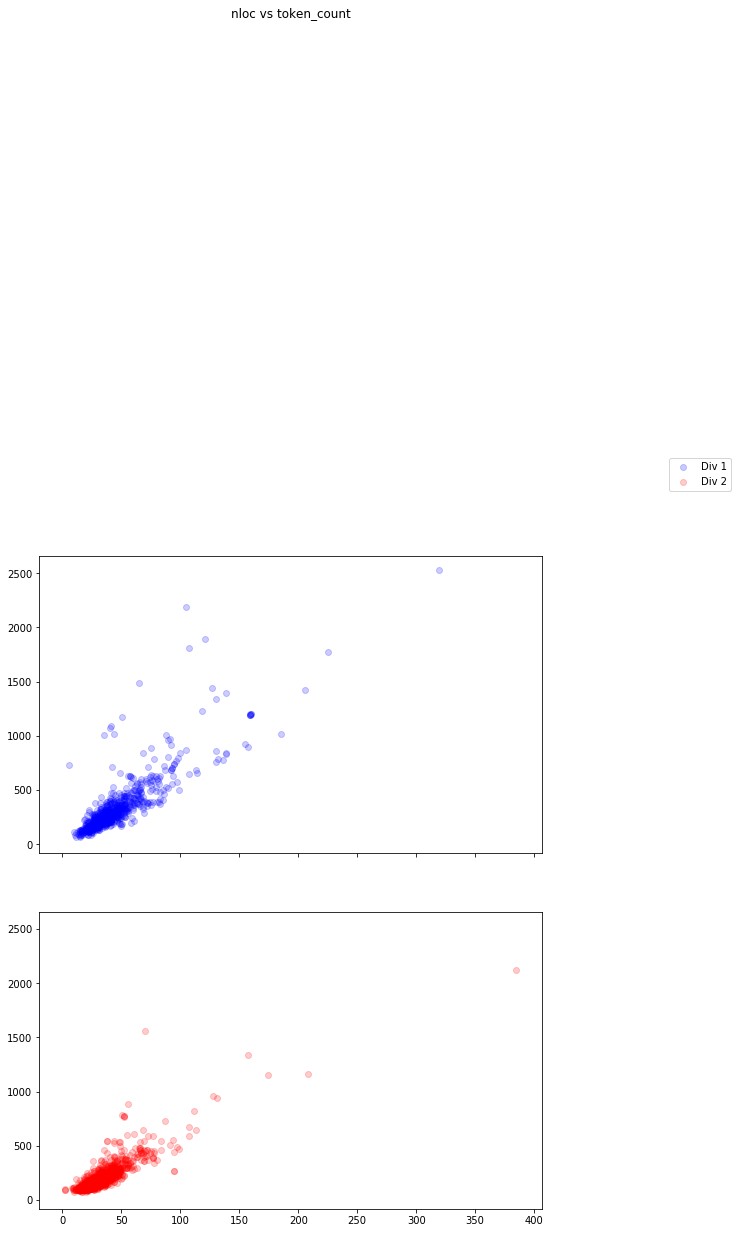

In [337]:
plot_data_2D_cat(nloc,token_count,userdiv,'nloc vs token_count')

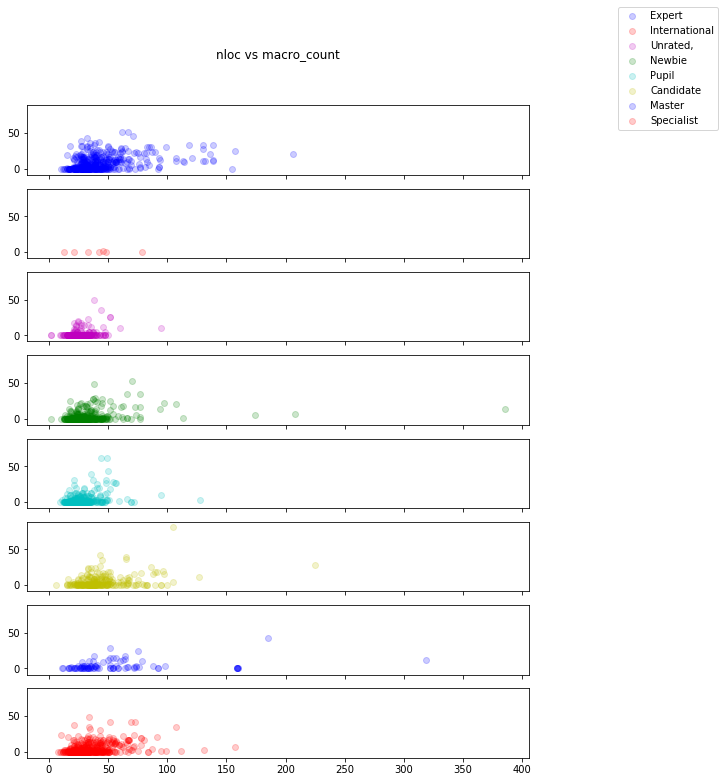

In [338]:
plot_data_2D_cat(nloc,macro_count,usertype,'nloc vs macro_count')

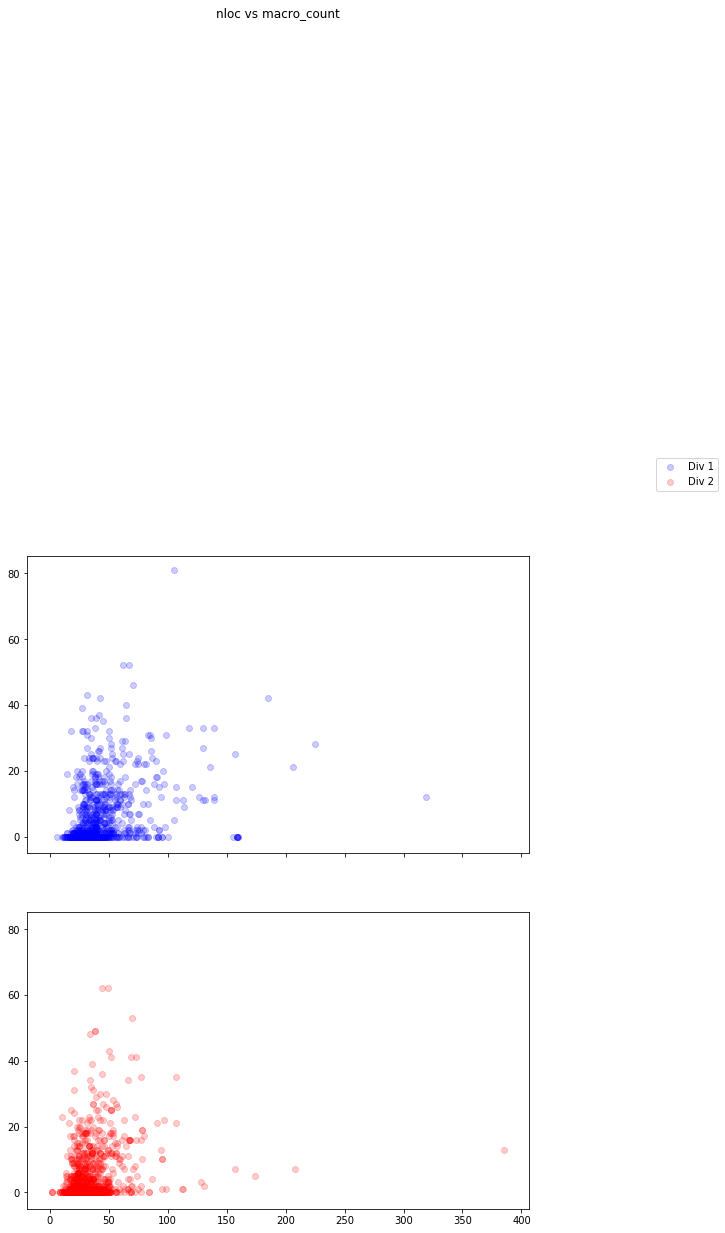

In [339]:
plot_data_2D_cat(nloc,macro_count,userdiv,'nloc vs macro_count')

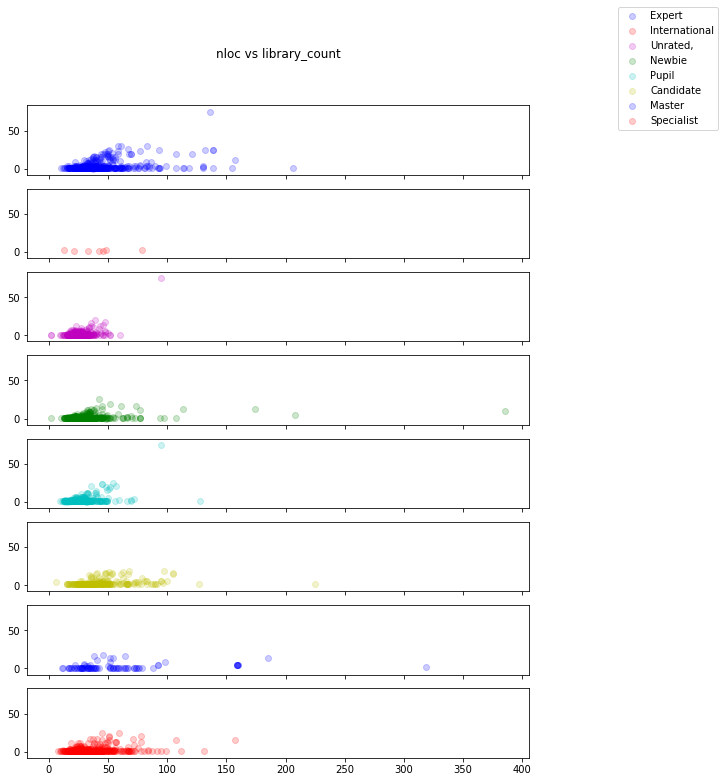

In [340]:
plot_data_2D_cat(nloc,library_count,usertype,'nloc vs library_count')

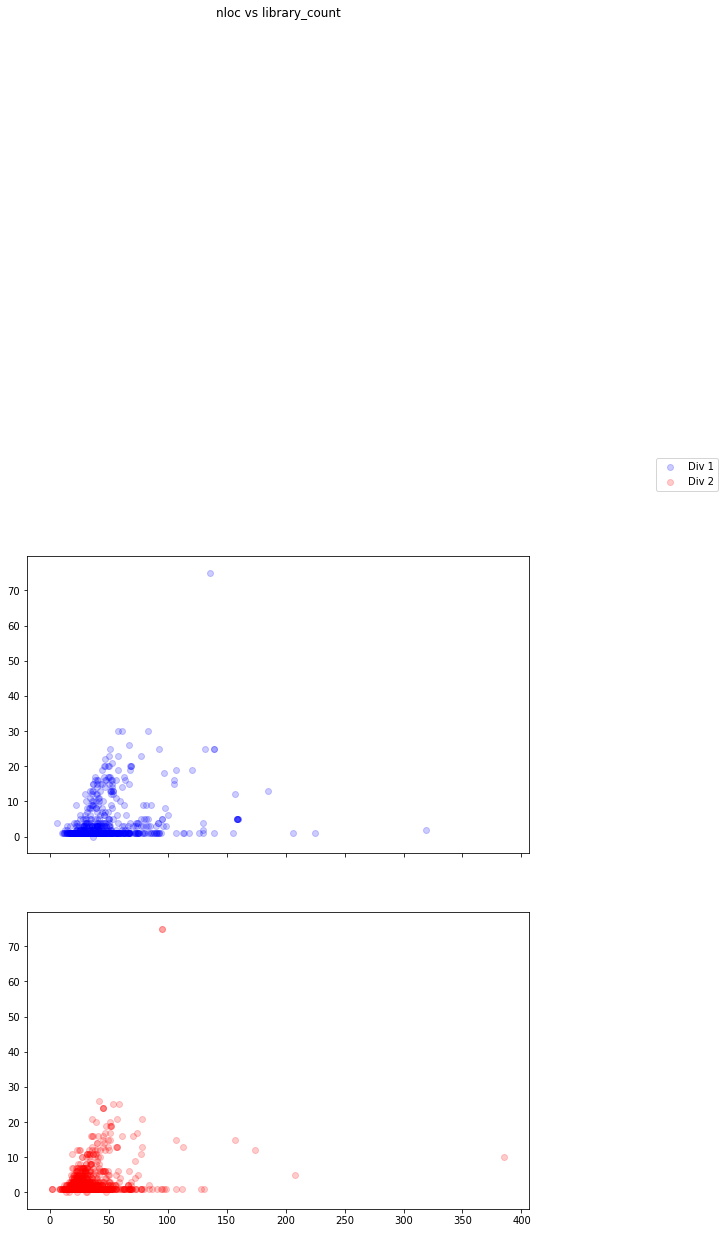

In [341]:
plot_data_2D_cat(nloc,library_count,userdiv,'nloc vs library_count')

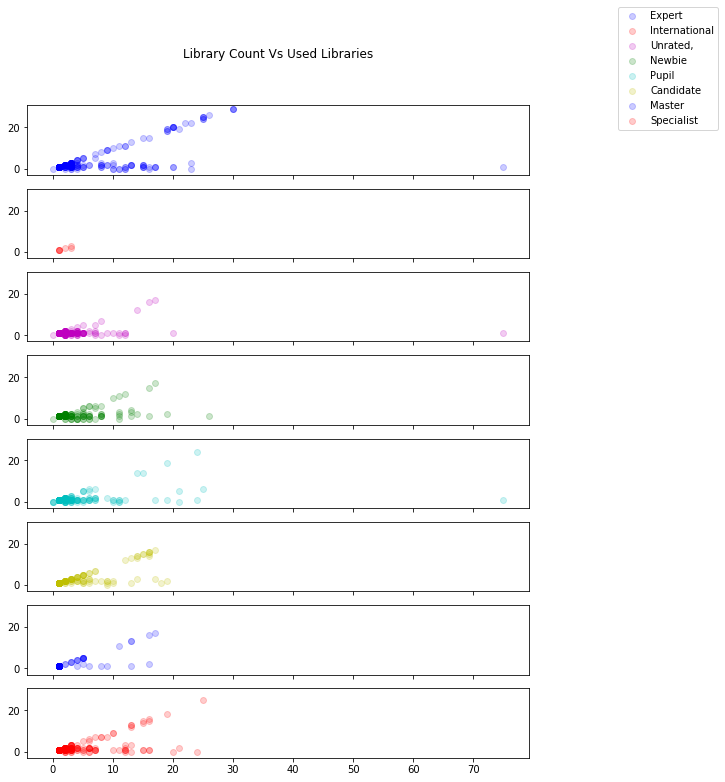

In [342]:
plot_data_2D_cat(library_count,used_library,usertype,'Library Count Vs Used Libraries')

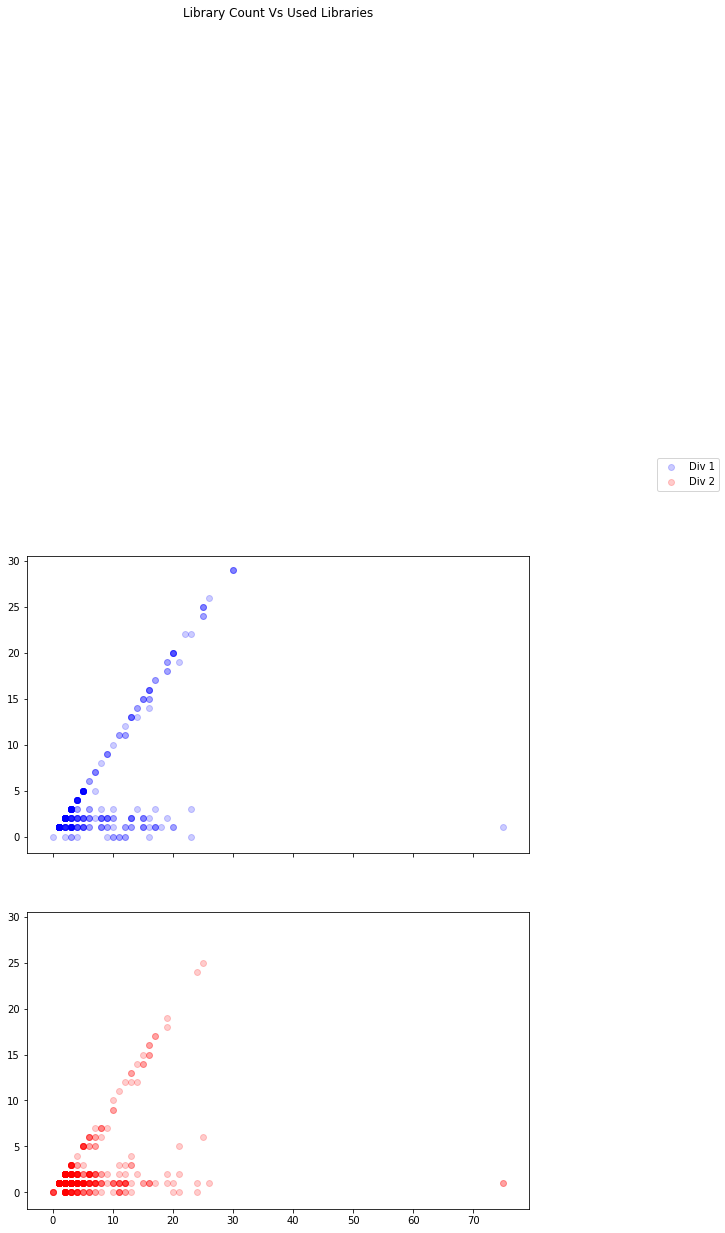

In [343]:
plot_data_2D_cat(library_count,used_library,userdiv,'Library Count Vs Used Libraries')

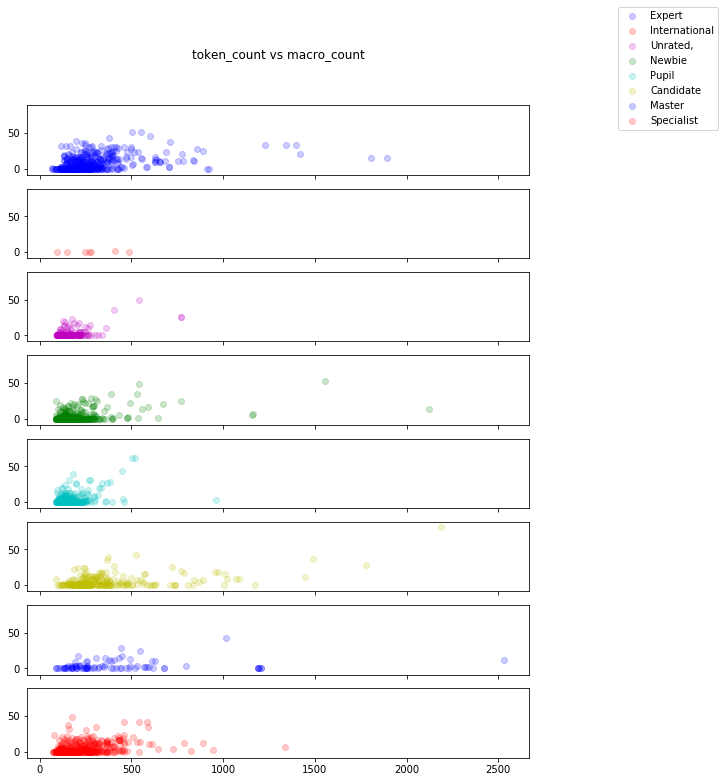

In [344]:
plot_data_2D_cat(token_count,macro_count,usertype,'token_count vs macro_count')

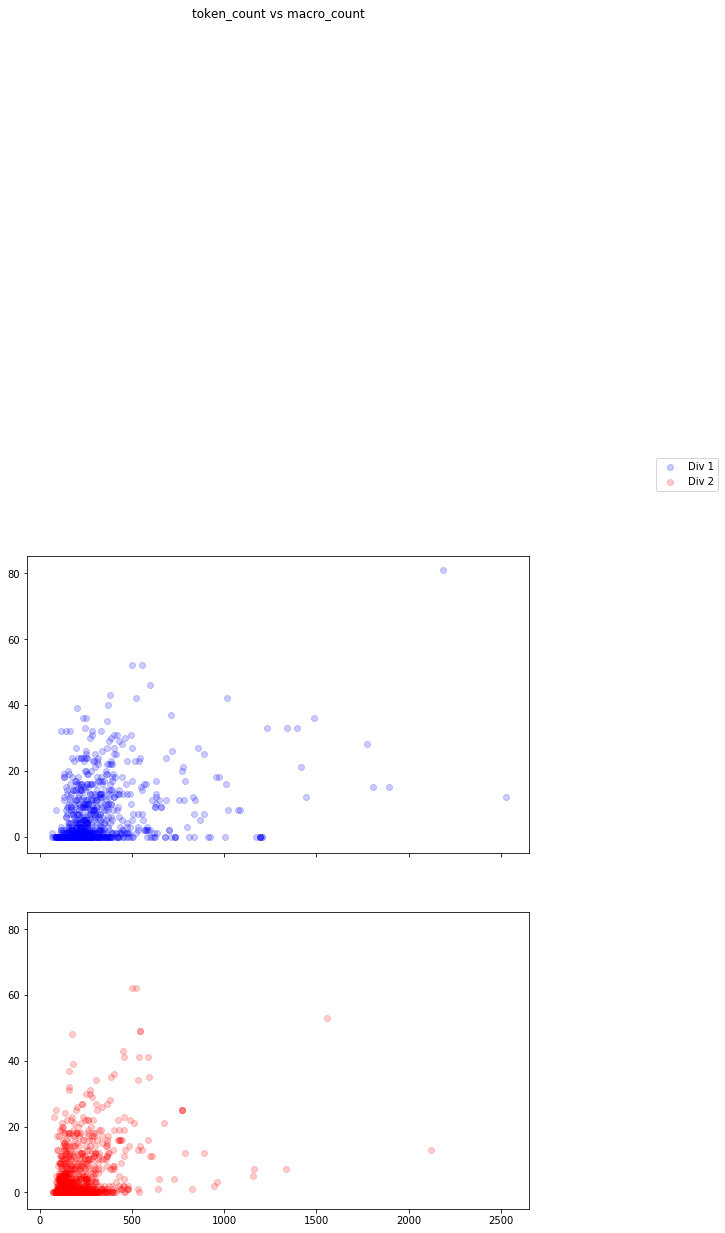

In [345]:
plot_data_2D_cat(token_count,macro_count,userdiv,'token_count vs macro_count')

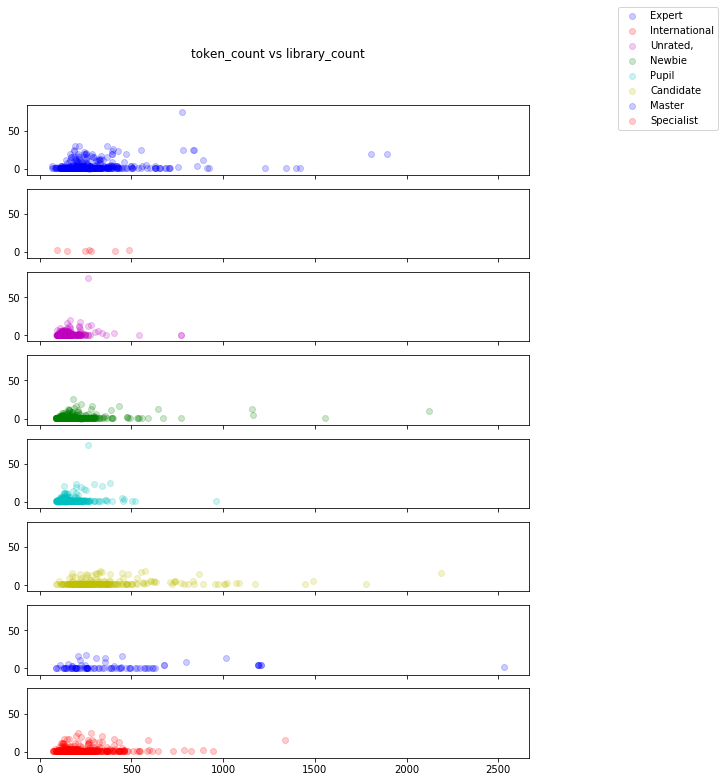

In [346]:
plot_data_2D_cat(token_count,library_count,usertype,'token_count vs library_count')

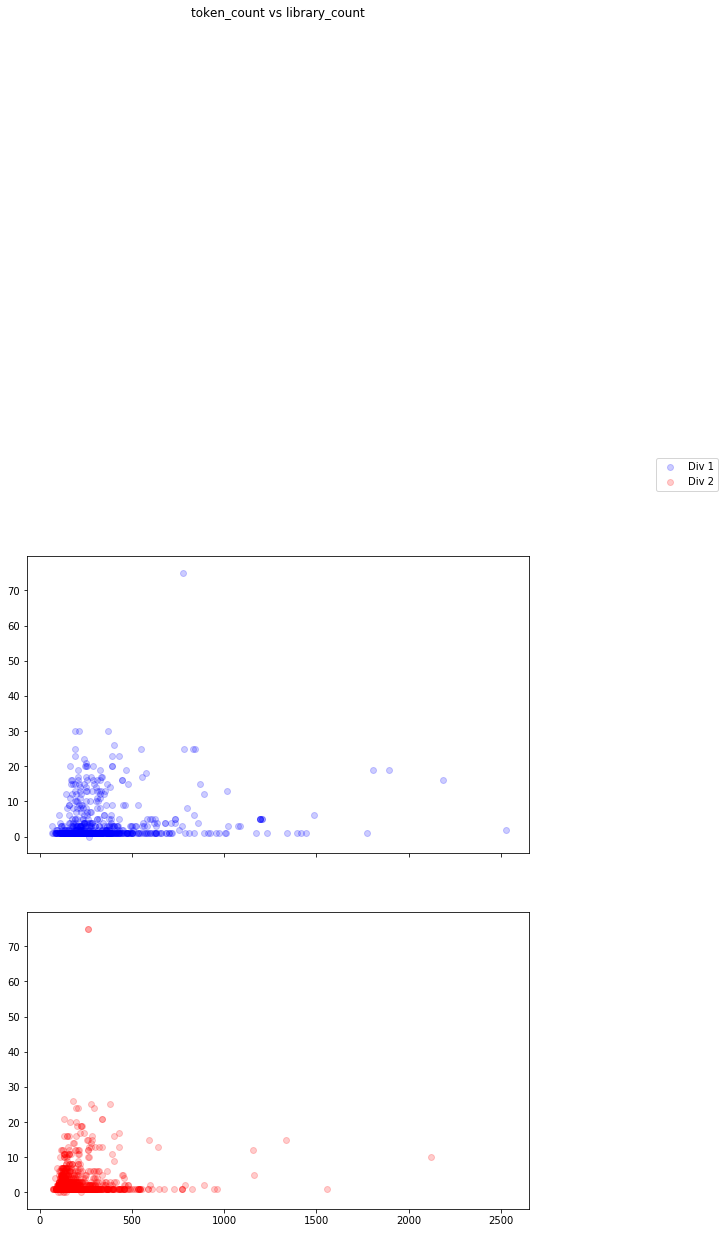

In [347]:
plot_data_2D_cat(token_count,library_count,userdiv,'token_count vs library_count')

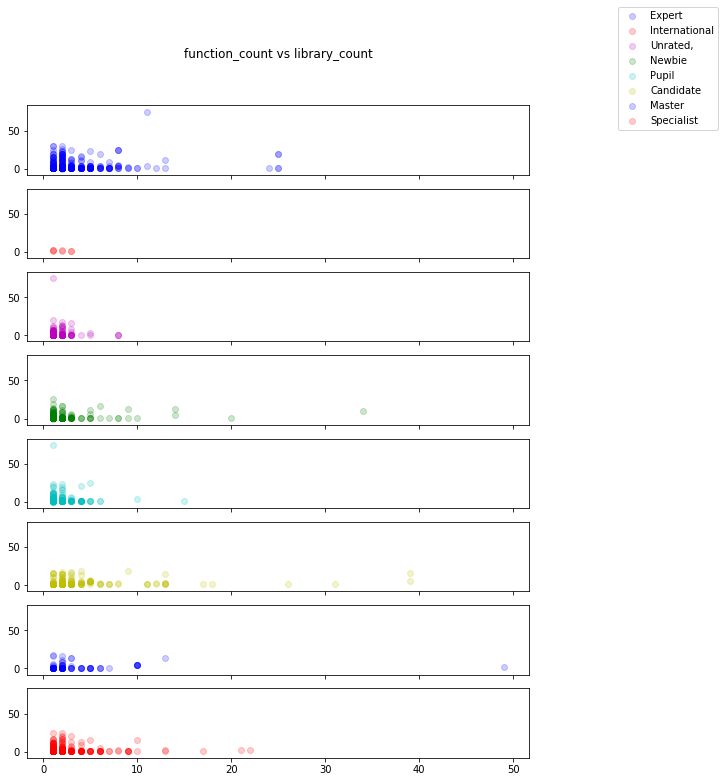

In [348]:
plot_data_2D_cat(function_count,library_count,usertype,'function_count vs library_count')

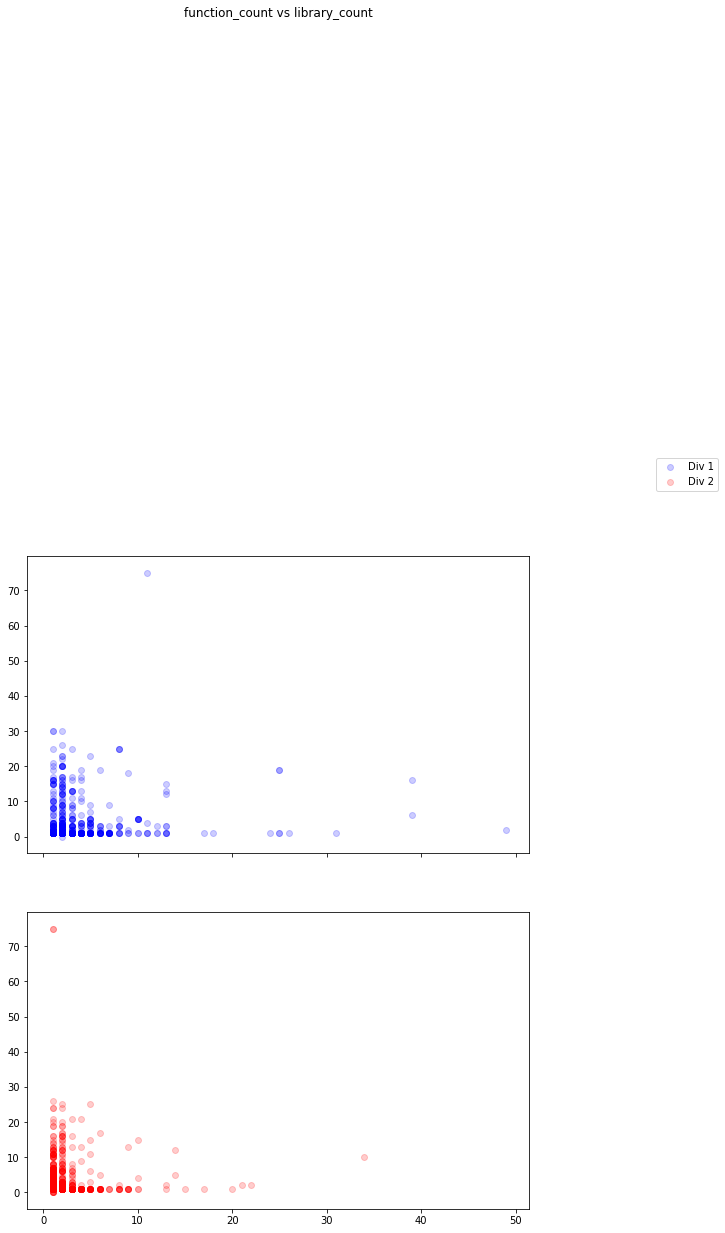

In [349]:
plot_data_2D_cat(function_count,library_count,userdiv,'function_count vs library_count')

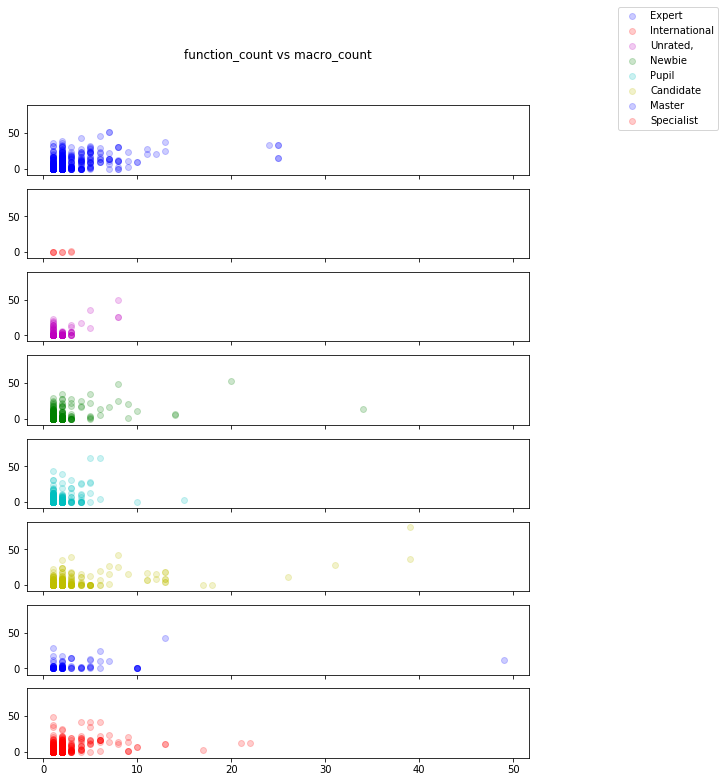

In [350]:
plot_data_2D_cat(function_count,macro_count,usertype,'function_count vs macro_count')

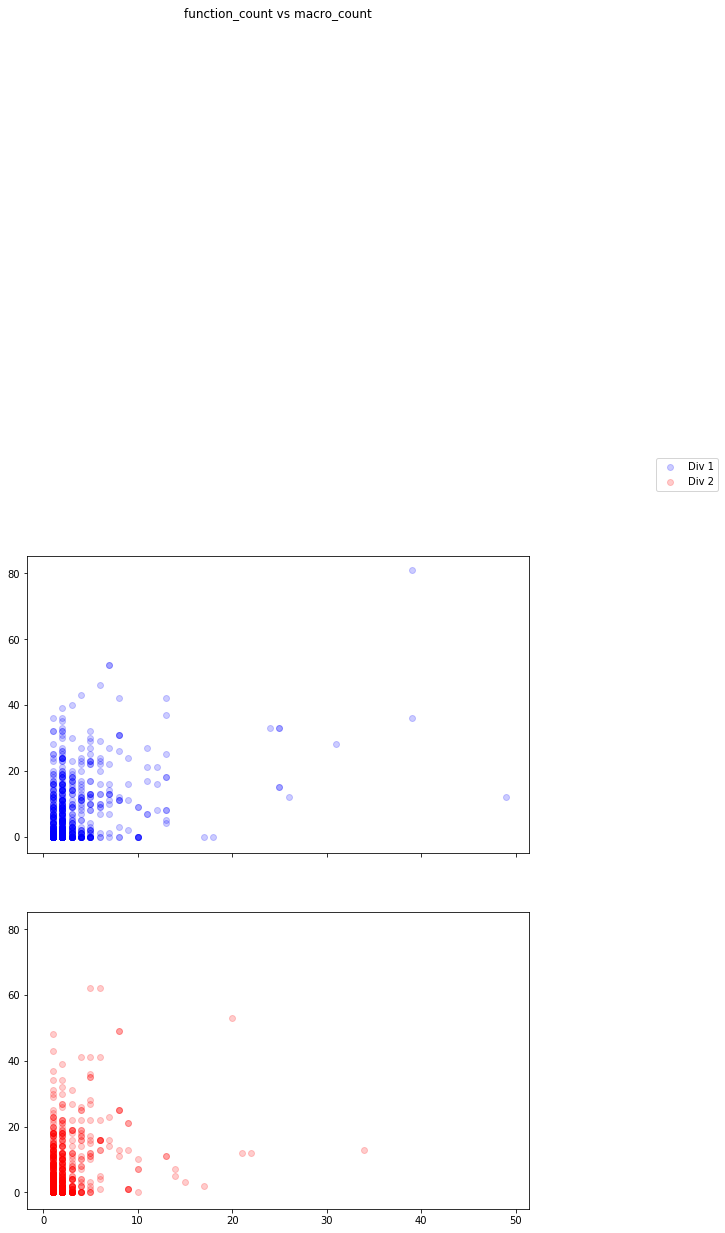

In [351]:
plot_data_2D_cat(function_count,macro_count,userdiv,'function_count vs macro_count')

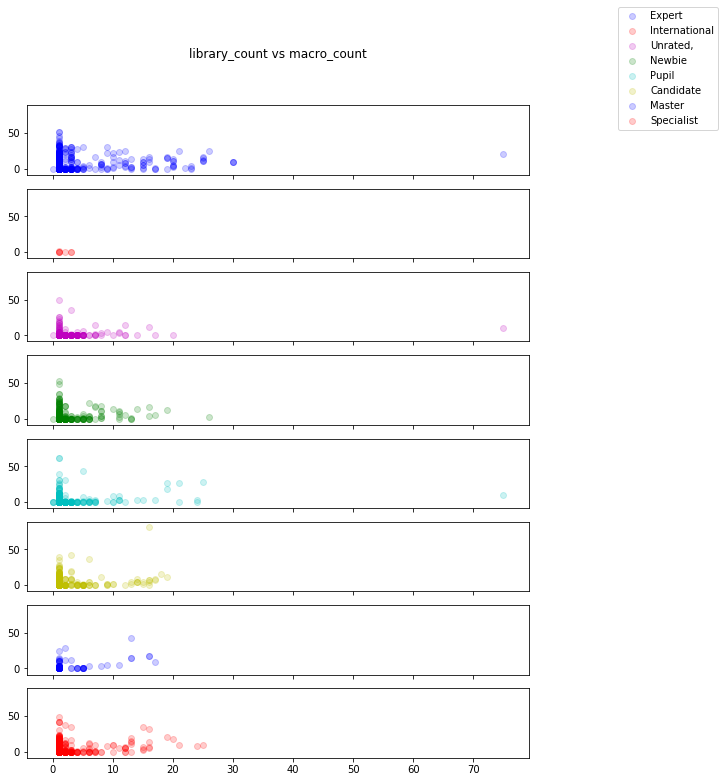

In [352]:
plot_data_2D_cat(library_count,macro_count,usertype,'library_count vs macro_count')

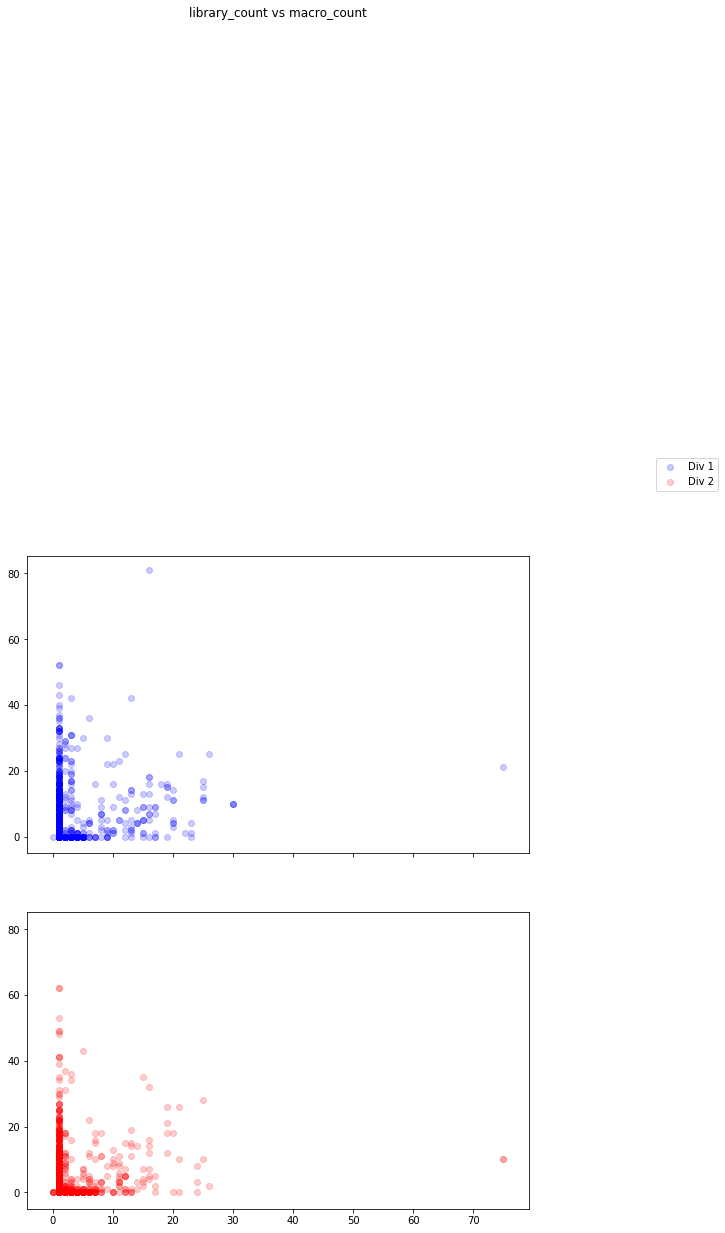

In [353]:
plot_data_2D_cat(library_count,macro_count,userdiv,'library_count vs macro_count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


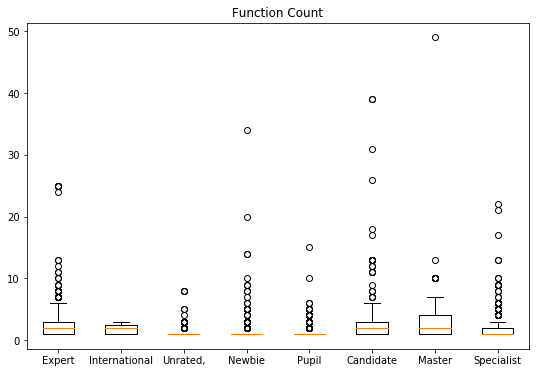

In [354]:
box_plot_cat(function_count,usertype,'Function Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


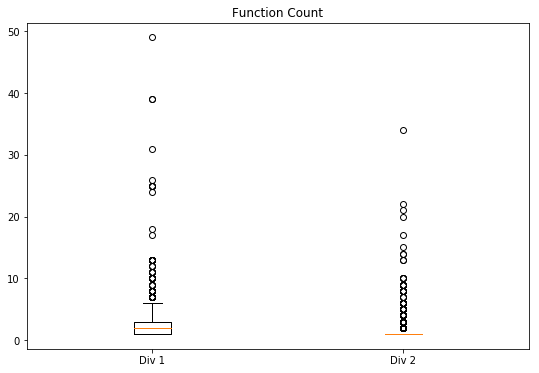

In [355]:
box_plot_cat(function_count,userdiv,'Function Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


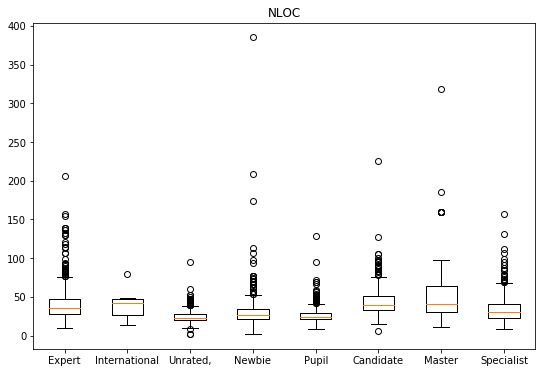

In [356]:
box_plot_cat(nloc,usertype,'NLOC')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


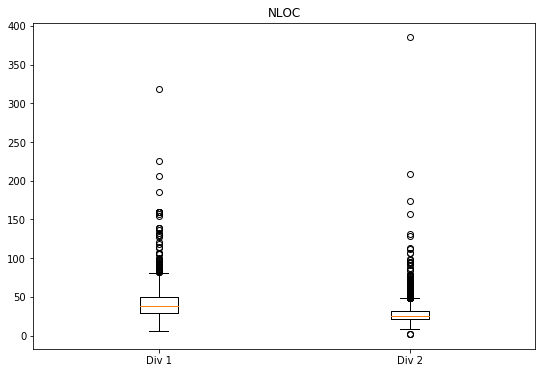

In [357]:
box_plot_cat(nloc,userdiv,'NLOC')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


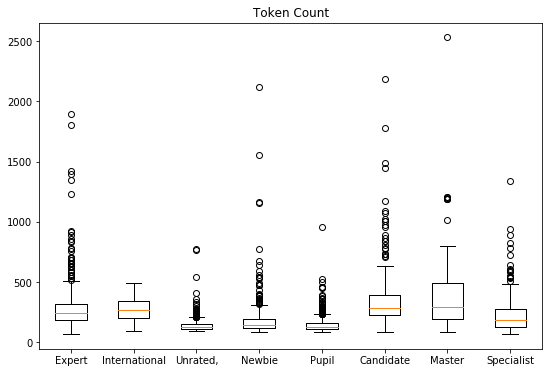

In [358]:
box_plot_cat(token_count,usertype,'Token Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


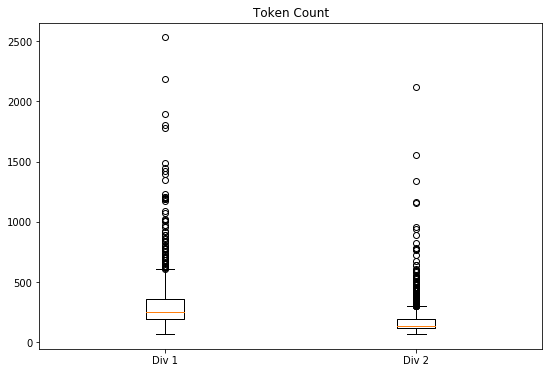

In [359]:
box_plot_cat(token_count,userdiv,'Token Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


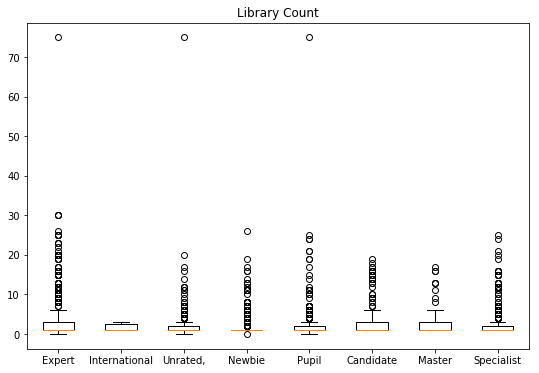

In [360]:
box_plot_cat(library_count,usertype,'Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


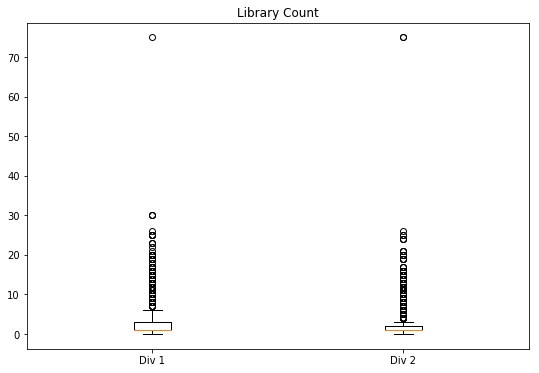

In [361]:
box_plot_cat(library_count,userdiv,'Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


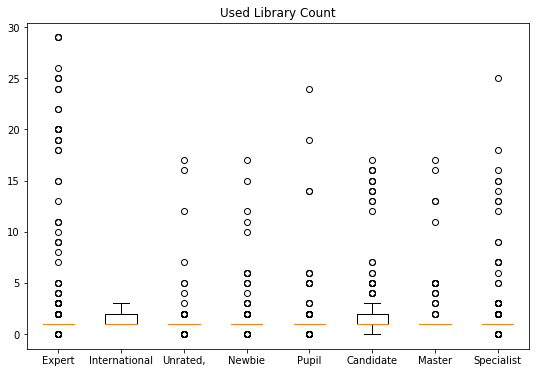

In [362]:
box_plot_cat(used_library,usertype,'Used Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


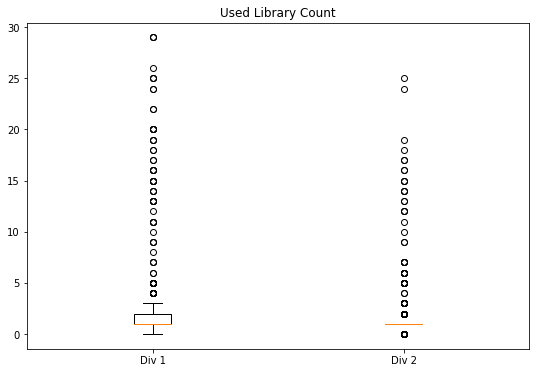

In [363]:
box_plot_cat(used_library,userdiv,'Used Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


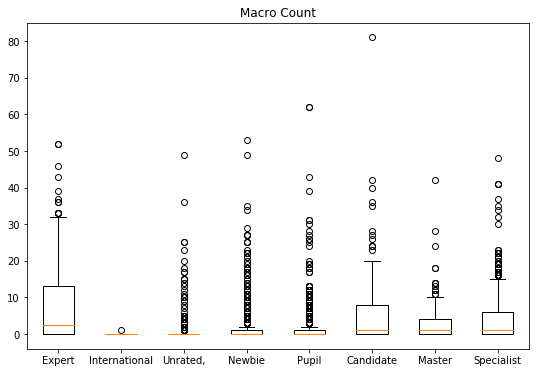

In [364]:
box_plot_cat(macro_count,usertype,'Macro Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


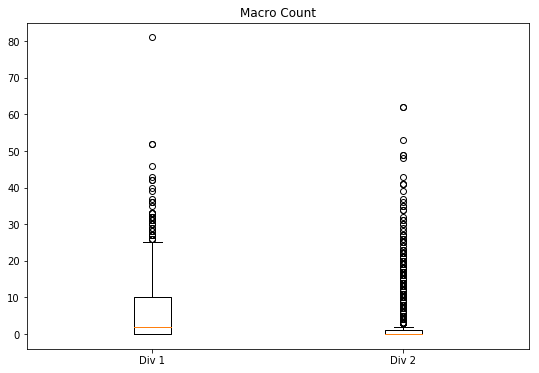

In [365]:
box_plot_cat(macro_count,userdiv,'Macro Count')